# EasyVisa Project

**INDEX**

1.IMPORTING NECESSARY LIBRARIES AND DATA

2.DATA OVERVIEW

3.EXPLORATORY DATA ANALYSIS (EDA)

    3.1 UNIVARIATE ANALYSIS

        A.NUMERIC VARIABLES
        
            1.VARIABLE 'NO_OF_EMPLOYEES'
            
            2.VARIABLE 'YR_OF_ESTAB'
            
            3.VARIABLE 'PREVAILING_WAGE'

        B.CATEGORICAL VARIABLES
        
            4.VARIABLE CASE ID
            
            5.VARIABLE 'UNIT_OF_WAGE'
            
            6.VARIABLE 'CONTINENT'
            
            7.VARIABLE 'EDUCATION_OF_EMPLOYEE'
            
            8.VARIABLE 'HAS_JOB_EXPERIENCE'
            
            9.VARIABLE 'REQUIRES_JOB_TRAINING'
            
            10.VARIABLE 'REGION_OF_EMPLOYMENT'
            
            11.VARIABLE 'FULL_TIME_POSITION'
            
            12.VARIABLE 'CASE_STATUS'
            
    3.2 BIVARIATE ANALYSIS

           a EDUCATION AND CASE STATUS
            
           b REGION AND EDUCATION
            
           c CONTINENT AND VISA STATUS
            
           c JOB EXPERIENCE AND VISA STATUS
            
           e UNIT WAGE AND CASE STATUS
            
           f PREVAILING WAGE AND CASE STATUS
            
           g PREVAILING WAGE AND CASE STATUS BASE ON REGION OF EMPLOYMENT
            
           h FULL TIME AND CASE STATUS
            
           i NUMBER OF EMPLOYEES AND CASE STATUS
            
           j YEAR OF COMPANY ESTABLISHMENT AND CASE STATUS
            
4. DATA PREPROCESSING

    4.1 CHECKING OUTLIERS FOR THE NUMERIC VARIABLES
    
    4.2 DATA ENGINEERING
    
    4.3 PREPARING DATA FOR MODELING
    
    4.4 DATA EVALUATION AND PERFORMANCE
    
5. CREATING A MODEL

    5.1 DECISION TREE MODEL
    
6. BUILDING BAGGING AND BOOSTING MODELS


    6.1 BAGGING
    
        6.1.1 BAGGING, MODEL BAGG
        
        6.1.2 RANDOM FOREST, MODEL RF

    6.2 BOOSTING
    
        6.2.1 ADABOOSTING
        
        6.2.2 GRADIENT BOOSTING
        
        6.2.3 XG BOOST
        
    6.3 STACKING
    
7. WILL TUNING THE HYPERPARAMETERS IMPROVE THE MODEL PERFORMANCE?

        7.1 DECICION TREE MODEL- DTREE_TUNED
        
        7.2 BAGGING- BAGG_TUNED MODEL
        
        7.3 RANDOM FOREST - RF_TUNED MODEL
        
        7.4 ADABOOSTING - ADA_TUNED MODEL
        
        7.5 GRADIENT BOOSTING - GB_TUNED MODEL
        
        7.6 XG BOOSTING - XGB_TUNED MODEL
        
        7.7 STACKING - STACK_TUNED MODEL
        
8. MODEL PERFORMANCE COMPARISON AND CONCLUSIONS

9.FINAL MODEL: GB MODEL FEATURES

10. ACTIONABLE INSIGHTS AND RECOMMENDATIONS





## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## 1.Importing necessary libraries and data

In [3]:
#To operate in jypiter
import pandas as pd
import numpy as np
#To plot graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#To suppress warnings
import warnings
warnings.filterwarnings('ignore')
#To split the data in training and testing samples
import sklearn
from sklearn.model_selection import train_test_split
#to import sklearn metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score
#To create tree decision models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#to tune models by using cross validation and Grid search of hyperparameters
from sklearn.model_selection import GridSearchCV
#To implement random forest
from sklearn.ensemble import RandomForestClassifier
#To implement bagging to create a model
from sklearn.ensemble import BaggingClassifier
#For boosting emsemble techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

## 2.Data Overview

- Observations
- Sanity checks

In [4]:
#to import dataset
data=pd.read_csv(r'C:\Users\charo\Downloads\EasyVisa.csv')

In [5]:
#making a copy of the original data
df=data.copy()

In [6]:
#set display option of the data frame
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',None)

In [7]:
#to check the size of the dataset
df.shape

(25480, 12)

 The data contains 25480 rows and 12 columns or features. 

In [8]:
#to see the generic structure of the dataframe
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
#To check duplicated data
df.duplicated().any()

False

In [10]:
#checking for null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No missing values detected in the dataset

In [11]:
#checking variables data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [12]:
#variables in dataset
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

We have checked the variable data types and we can conclude that three of them, ‘no_of_employees’, ‘yr_of_estab and ‘prevailing_wage’ are numeric. The rest of the variable are object types so we will need to change them into categorical variables in order to operate with them. The object type variables are: 'case_id', 'continent', 'education_of_employee', 'has_job_experience','requires_job_training', 'region_of_employment',  'unit_of_wage','full_time_position' and 'case_status'.

In [13]:
#using a for loop to change object type variables into categorical variables.
#creating a list with the object type columns
col_tocat=df.select_dtypes(include='object').columns

In [14]:
#applying for loop to change data type of all object variables to categories
for i in col_tocat:
    df[i]=df[i].astype('category')
   

In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Above we can see how there are not more object type variables in the dataset. We can now work with the data.

## 3.Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 
   **Answer on section a and b- bivariate analysis**
2. How does the visa status vary across different continents? 
 **Answer on section c- bivariate analysis**
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
  **Answer on section d- bivariate analysis**
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
  **Answer on section e- bivariate analysis**
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**Answer on section f- bivariate analysis**

In [16]:
# summary statisitical for numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [17]:
#When checking prevailing wage, we can see the lower amounts belong to the hourly rates
df[df["prevailing_wage"] < 100].head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,EZYV339,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,EZYV635,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,EZYV840,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,EZYV877,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,EZYV996,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified


In [18]:
#When checking prevailing wage, we can see the larger amounts belong to the yearly rates
df[df["prevailing_wage"] > 3100].head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified


In [19]:
#creating a list with discrete numeric data type variables
col_num=['no_of_employees','yr_of_estab']

In [20]:
#showing the unique values on the discrete data 
for col in col_num:
    r=df[col].value_counts().sort_values(ascending=False)
    print(r)
    pd.set_option('display.max_rows', 6)

183      18
724      16
854      16
766      15
1476     15
         ..
29736     1
86026     1
54356     1
28704     1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64
1998    1134
2005    1051
2001    1017
        ... 
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64


In [21]:
# We can see some data related to number of employee appear to be negative
negative_number_employee=df[df['no_of_employees']<0]
negative_number_employee.head(3)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified


From the three numerical variables we can see that the companies that appear in the database are established between 1800 and 2016.The median date of creation of the companies in the data frame is 1997.

Number of employees is showing negative values, there is a range of negative values from -26 to 0 and we would need to decipher what this numbers mean. This distribution is highly skewed, since the 75th of the companies’ size is 3,500 employees and the maximum number is 602,069 employees what is 172 times the 75th percentile.

‘Prevailing_wage’ is showing the data in different units, Hourly, Weekly, Monthly, and Yearly. We need to make the data homogeneous in order to be able to compare the information, but we are unaware of the number of working hours agreed per employee. We cannot compare yearly prevailing rate with hourly rate ones. Obviously, the lower values correspond to hourly rate and the higher values would be yearly prevailed salaries, the ones above the 75th percentile are related to yearly prevailing values. We me think the distribution contains outliers but instead of outliers we could consider the variable as upper values of the distribution because as we could see previously, any yearly variable would throw higher values. The mean number for this variable is not represented properly because the values are not comparable and indeed the information provided in the stats summary could be a biased because the use of different type of rates.

  

In [22]:
# summary statisitical for categorical variables
df.describe(include='category').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
...,...,...,...,...
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [23]:
#showing the unique values on the discrete data 
for col in col_tocat:
    r=df[col].value_counts(normalize=True).sort_values(ascending=False)
    print(r)
    print('-----')
    pd.set_option('display.max_rows', 6)

EZYV01      0.000039
EZYV03      0.000039
EZYV05      0.000039
              ...   
EZYV9998    0.000039
EZYV9979    0.000039
EZYV9999    0.000039
Name: case_id, Length: 25480, dtype: float64
-----
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
-----
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
-----
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
-----
N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64
-----
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64
-----
Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64
-----
Y    0.89376
N    0.10624
Name: full_

In [24]:
#resetting the initial display row values
pd.set_option('display.max_rows', 200)

In [25]:
 #resetting the initial display row values
pd.set_option('display.max_rows', 200)

In regards with the categorical variables, we can see that case Id do not show any relevant information for the study. Indeed, every employee just have a different case Id.

Continent is showing the origin of each prospective employee. we can see that the one with higher frequency is Asia with the 66% of the petitioners, followed by Europe with only 14%. In last position we can see Oceania, with less than 1% and Africa with only 2% of the visa petitioners.

Education of employees shows four levels, Bachelor's Degree is the most common with 40% of the visas belonging to this type of education, followed by Master’s degree (37%), High school (13%) and in last position Doctorate (8%).

Most of the visa requesters have previous job experience (58%) and only 42% of the requesters do not have any previous job experience.

The area where visa petitioners intend to work are Northeast of the US in first position (28%), followed by South of the country (27%) and West (25%).  Midwest area only counts with 17% of the petitioners and the island with a bit more than 1%.

As previously mention, the unit of wage is given in yearly values most of the times (90% of the data), followed by hourly rates, weekly and monthly (less than 1%).

Full time position variables is letting us know if the job offered for the foreign employees is full time or part time. We can see that 89% of the job offers are full time. 

Case status is our target variable. This variable is letting us know what visas are accepted or not. The data is letting us that 66% of the working visas are accepted. We have only two values, certified which means accepted and denied which means that the visa was not approved.


## 3.1 Univariate analysis

**A.Numeric variables**

In [26]:
df.select_dtypes(np.number).columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**1.Variable 'no_of_employees'**

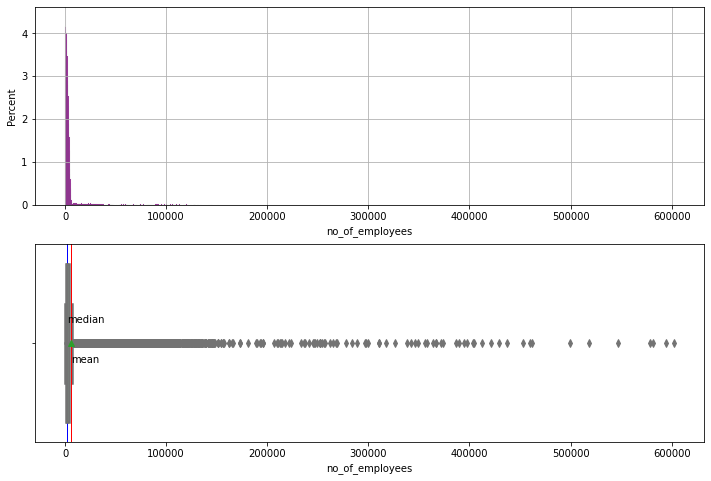

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df['no_of_employees'], stat="percent", color="purple")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df['no_of_employees'],
    showmeans=True,
    linewidth=2.5,
    palette='rainbow',
)
plt.axvline(x=2109.00, linewidth=1, color="blue")  # we draw the median value
plt.axvline(x=5667, linewidth=1, color="red")  # we draw the mean value
plt.text(x=2109.00, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=5667, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

The number of employees is highly right skewed with lots of outliers, especially on the upper values.
There are some negative values that we would need to fix, since no company can have a negative number of employees.
the distribution mean value is 5667 employees but since the distribution is highly skewed, the mean value, 2109 employees would be a more representative average value.


In [28]:
#Changing negative values to positive values
df['no_of_employees']=df['no_of_employees'].apply(lambda x: np.abs(x) if x<0 else x )

In [29]:
df['no_of_employees'].min()

11

**2.Variable 'yr_of_estab'**

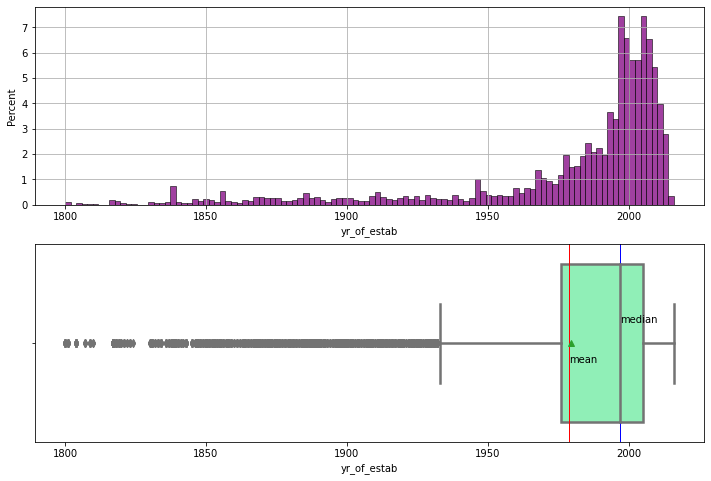

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df['yr_of_estab'], stat="percent", color="purple")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df['yr_of_estab'],
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(x= 1997, linewidth=1, color="blue")  # we draw the median value
plt.axvline(x=1979, linewidth=1, color="red")  # we draw the mean value
plt.text(x=1997, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=1979, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

The range of the Year each company was founded is quite wide, but we can see that most of the companies requesting working visas for their employees are relatively new, created in the late nineties or early years of the XXI century.
There are of course may outliers in the lower extreme of the distribution. The oldest company on the dataset was founded in 1800.average value.


**3.Variable 'prevailing_wage'**

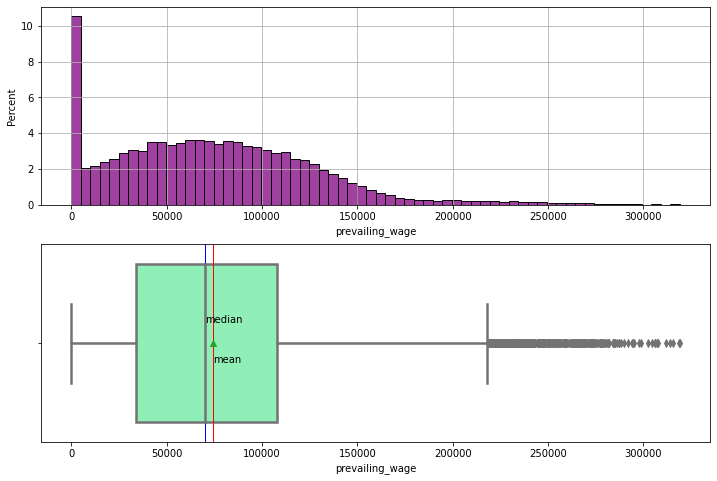

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df['prevailing_wage'], stat="percent", color="purple")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df['prevailing_wage'],
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(x=70308, linewidth=1, color="blue")  # we draw the median value
plt.axvline(x=74455, linewidth=1, color="red")  # we draw the mean value
plt.text(x=70308, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=74455, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

This variable contains data in different units, yearly rate, weekly rate, hourly rate. It makes very difficult to compare the data in this case because it is not given homogeneously. We could see how the lower extreme of the  distribution is given in hour rate, so it makes sense.The lower values of the distribution are given in different units. Beside this, most of the data is given in yearly rate so we can see it is almost normally distributed but we have many outliers on the upper extreme values.

Later on we are going to compare the data and also perform a more detailed analysis along with the unit_of_wage variable.


**B.Categorical variables**

In [32]:
df.select_dtypes('category').columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**4.Variable Case ID**

In [33]:
df['case_id'].value_counts().sum()

25480

This variable is only providing a case number to each visa petition, so we do not need it to the analysis. We can remove it from the data.

In [34]:
df.drop('case_id', axis=1, inplace=True)

**5.Variable 'unit_of_wage'**

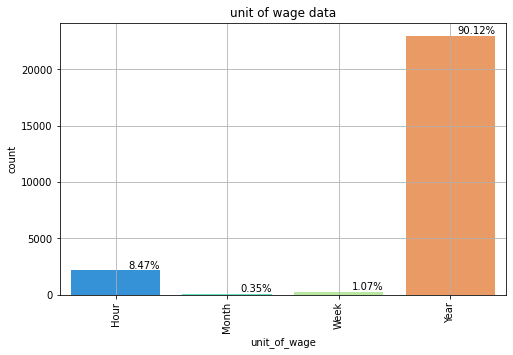

In [35]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x='unit_of_wage', palette='rainbow'
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("unit of wage data")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

Most of the unit of wage are expressed on yearly rate, as we see with 91% of the wage values, express in yearly wage. The 8.5% unit of wage used is hour wage, followed by 1.1% weekly wage and in last position 0.3% monthly wage.

**6.Variable 'Continent'**

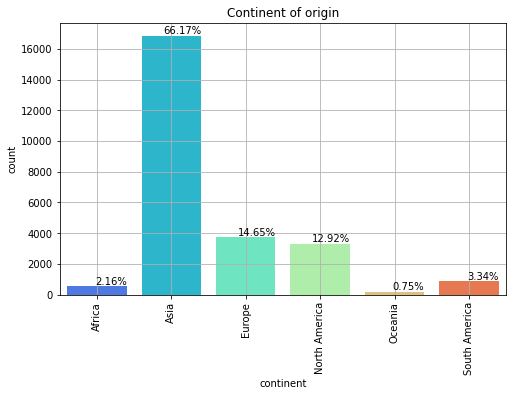

In [36]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x='continent', palette='rainbow'
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("Continent of origin")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

As per the data plotted above, we can see that the 66.17% of the visa requesters are from Asia, followed by European with 14.65 per cent of the request and other North American countries, like Canada or Mexico with 12.92 per cent of the visa petitions. On the lower extreme of the graph, the continent with less petitioners is Oceania with less than 1 per cent, followed by Africa with 2.16 per cent and South America with 3.34 per cent of the requests.

American companies are mostly looking for certain type of professional than cannot be found easily in the country or there is a shortage in a specific field to cover all the positions opened by companies. Many of these positions are related to Technology, IT and Research fields and Asiatic and European countries are the ones that 'biggest jobs markets' where this type of skills can be found.

**7.Variable 'education_of_employee'**

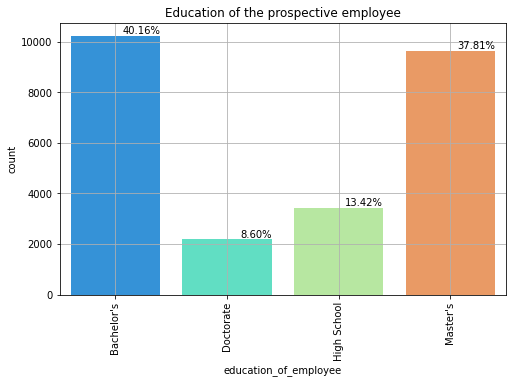

In [37]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='education_of_employee', palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Education of the prospective employee')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

The graphic representation is showing how only 13 per cent of the visa petitioners do not have higher education.
The prospective employees that earned a bachelor's degree is around 40 per cent of the applicants, followed by master’s degree holders with a 37.81 per cent. Doctorate professional applicants sum up to 8.6 per cent which it makes sense since there are less job openings for this high skill professionals when compared to the overall job market.
 

**8.Variable 'has_job_experience'**

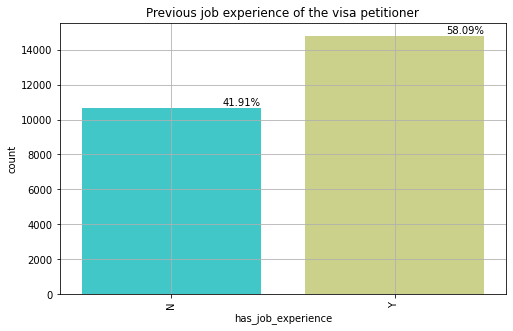

In [38]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='has_job_experience', palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Previous job experience of the visa petitioner')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

From the data we can see how the 58 per cent of the applicants have previous job experience before applying for the US working visa and surprisingly almost 42 per cent apply without any previous work experience  in the field.

**9.Variable 'requires_job_training'**

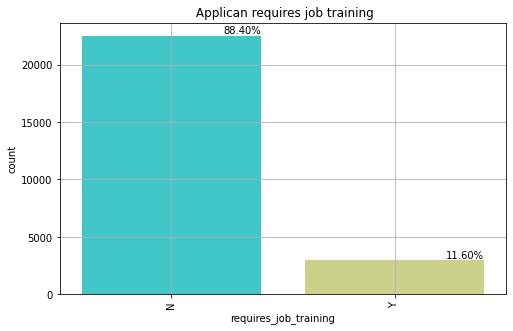

In [39]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='requires_job_training', palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( ' Applican requires job training')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

From the data we can conclude that most of the job visa applicants do not need any type of training to start their prospective jobs. Only 11.6 per cent of the applicants would need any type of training.

**10.Variable 'region_of_employment'**

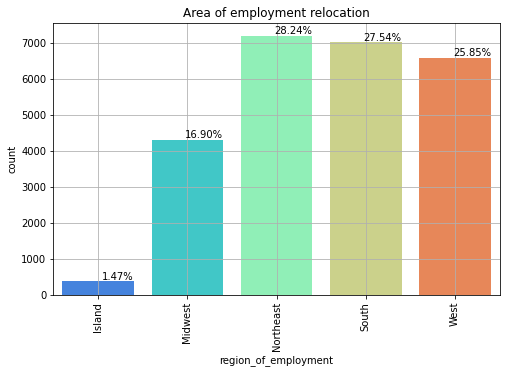

In [40]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x= 'region_of_employment', palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Area of employment relocation')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

The graph is showing that around 28 per cent of the applicant would be relocating in the Northeast Regions of the country; the South of the United States would be the second most demanded area of prospective employees, followed by the West with almost 26 per cent of the applications. On the tail we can see the US islands(Hawaii, Puerto Rico along with less densely populated islands) would represent less than 1.5 per cent of the data followed by Midwest with close to 17 per cent of the applications.

**11.Variable 'full_time_position'**

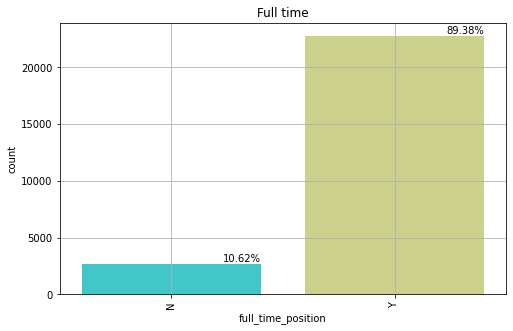

In [41]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='full_time_position' , palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Full time')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

Petitioners Companies and job applicants should guarantee sufficient and stable job income to access adequate life conditions in the country. That is mostly achieved by obtaining a full-time position and related income. So, it is not surprising that most of the applicant, 90 per cent of them are applying to get a full-time position.
It is unclear the type of job contracts offered to other the applicants (non-full time employment); it is not mentioned if they have been offered a part time job or any other type of employment conditions.


**12.Variable 'case_status'**

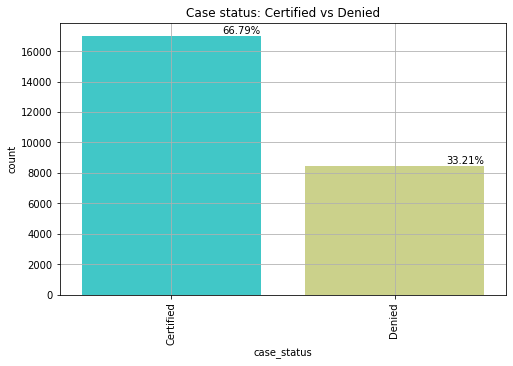

In [42]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='case_status' , palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Case status: Certified vs Denied')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

Most of the applications were certified for the time frame of study.  Only 33 of the applications did not get an approval opposed to the almost 67 per cent of approved applications. 

## 3.2 Bivariate analysis

Let's create a general analysis before we check each of the variables. For numeric variables we are creating a pairplot representation to find patterns in some of the relevant variables and also a Heatmap plot in order to look for correlation.

In [43]:
"""We create a subset with all the numeric variables in order to apply the pairplot  and
heatmap functions from seaborn"""
#Dataframe to apply heatmap 
df_heatmap = df.select_dtypes(np.number)
#Dataframe to apply pairplot
df_pair=df[['no_of_employees','prevailing_wage','yr_of_estab','case_status']]


**PAIRPLOT**

<Figure size 7200x3600 with 0 Axes>

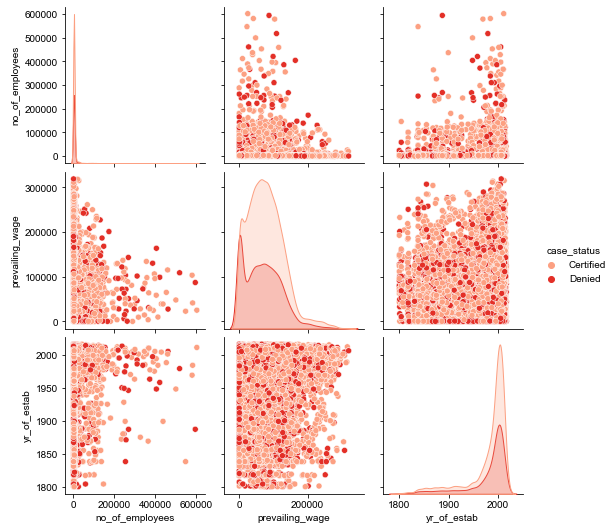

In [44]:
plt.figure(figsize=(100,50))# set size
sns.pairplot(data=df_pair, diag_kind="kde",height=2.5, palette="Reds", hue='case_status')  # pairplot with histogram in the diagonal.
sns.set(font_scale=1)# label axis fontsize

There are not patterns within the numeric variables that can provide with any relevant information for the case study. We can see a negative relationship between number of employees and prevailing wage. Also, it seems that the older the companies are, the less employees they have working for them. It seems also there is a slightly positive relationship between years of establishment and prevailing wage, The younger the company the higher the prevailing wage.

**HEATMAP**

<AxesSubplot:>

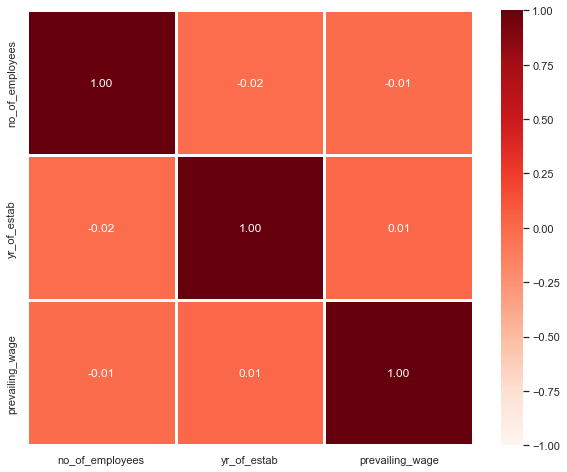

In [45]:
"""we will plot a heatmap with a min value of -1 and max value of 1 to simulate the 
coefficient of correlation."""
plt.figure(figsize=(10, 8))  # setting the size of the plot
sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="Reds",linewidths=3, linecolor='white',)  # creating heatmap with annotations

There is almost zero correlation between the numeric variables. They are independent ones from the others since their correlation is close to zero. 

**a-EDUCATION AND CASE STATUS**

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

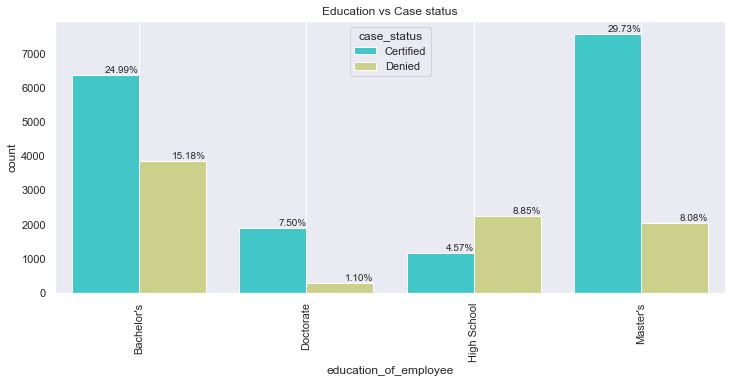

In [46]:
plt.figure(figsize=(12, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['education_of_employee'],hue=df["case_status"], palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Education vs Case status')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

In [47]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee           
Bachelor's             Certified    0.622142
                       Denied       0.377858
Doctorate              Certified    0.872263
                       Denied       0.127737
High School            Denied       0.659649
                       Certified    0.340351
Master's               Certified    0.786278
                       Denied       0.213722
Name: case_status, dtype: float64

As we can see above, the rate of denied cases is higher when the employee does not have higher education.
As per the data, almost 90 per cent of the doctorate holders are certified, followed very close by the master’s degree holders with 78 per cent of the cases approved. For the bachelor’s degree holders, the rate will decrease to 62 per cent of approved cases.


**b. REGION AND EDUCATION**

Let's check if each region would request different educational profiles, depending of the prevalent field or business activity  of each area.

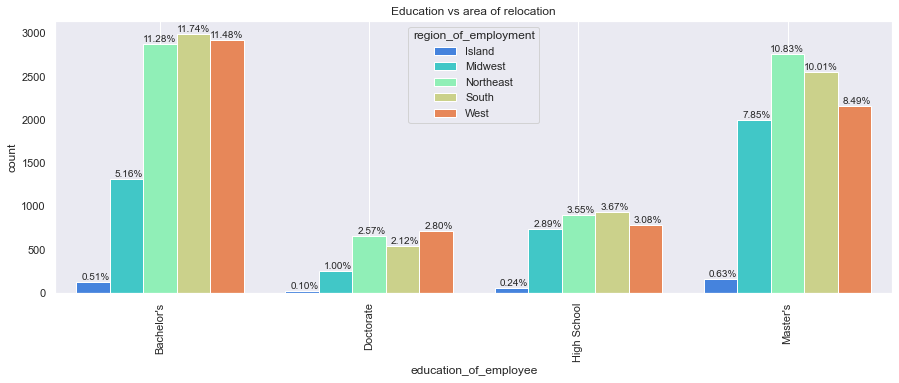

In [48]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['education_of_employee'],hue=df['region_of_employment'], palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Education vs area of relocation')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

The area with higher demands of doctorate employees is the West of the Country, probably California is the region that is attracting most of these profiles, because of the relevance of the Technological sector, and big research companies set up in areas as Silicon Valley. The Northeast of the US is another big receptor of doctorate holders. The opposite behavior can be observed in the Island region.

In Regards with the bachelor’s degrees, The South is requesting most of this category of workers, followed by the West Region and Northeast. the percentage are very similar, 11.74%, 11.48% and 11.28% respectively. The Island and Midwest demand of employees with bachelor's degree is lower as we can see in the plot.

Master's degrees are more prevalent in the Northeast area, with 10.83 per cent of all the request, followed by the South of the US and surprisingly with West area as a third area of request with only 8% of the overall data.

High school holder first destination is the South of the United States and the Northeast region.


In [49]:
#Now we check education in precentage per region
df.groupby('region_of_employment')['education_of_employee'].value_counts(normalize=True)

region_of_employment             
Island                Master's       0.429333
                      Bachelor's     0.344000
                      High School    0.160000
                      Doctorate      0.066667
Midwest               Master's       0.464360
                      Bachelor's     0.305317
                      High School    0.170885
                      Doctorate      0.059438
Northeast             Bachelor's     0.399444
                      Master's       0.383600
                      High School    0.125782
                      Doctorate      0.091174
South                 Bachelor's     0.426251
                      Master's       0.363546
                      High School    0.133105
                      Doctorate      0.077098
West                  Bachelor's     0.444124
                      Master's       0.328272
                      High School    0.119192
                      Doctorate      0.108412
Name: education_of_employee, dtype: float64

If we analyze the education employment requirements per regions instead of comparing with the entire dataset, we can compare the Education per regions in percentage.

- For the Island region, the master’s degrees are in high demand, follow by bachelor's degrees with 42% and 32% of the total visa applications. In last position we can see the doctorate applicants with only 0.06%.

- Midwest region, prefer master’s holders over the rest of educational backgrounds with 46% of the visa petitions, followed by bachelor's holders and high school graduates. In last position with only 0.05%, we can find doctorate applicants.

- In the Northeast area, they are mostly requesting bachelor's degree holders and master's degrees almost in same proportions, 38 and 39 percent respectively. In last position, with almost 1% of the total of request, we can find the doctorate holders. High school applicants are about 12% of the region visa requesters.

- South would also assign a bigger proportion to the bachelor’s degree holders with 42% of the application, followed by master's degrees (36% of the area visa requests), high school graduate (13%) and Doctorate in last position with 0.07%.

- West region also has a high volume of bachelor's degree applicants (45 per cent of the region data), followed by master’s degree holders (32%). High school graduate and Doctorate Percentage are very similar, 10 and 11 per cent respectively. West region is the one requesting the greater percentage of Doctorate holders of all regions.


Now let's compare the number of visa approval per region and educational level in reference with the total data.

In [50]:
#create subdata frame with only certified cases
df_certif=df[df['case_status']=='Certified']


In [51]:
#distribution of visa approval per region and education
pd.crosstab(df_certif['education_of_employee'],df_certif ['region_of_employment'],margins=True)



region_of_employment,Island,Midwest,Northeast,South,West,All
education_of_employee,,,,,,
Bachelor's,77,964,1631,1982,1713,6367
Doctorate,22,232,567,487,604,1912
High School,18,298,263,355,230,1164
Master's,109,1759,2065,2089,1553,7575
All,226,3253,4526,4913,4100,17018


In [52]:
#distribution of visa petition per region and education
pd.crosstab(df['education_of_employee'],df['region_of_employment'], margins=True)

region_of_employment,Island,Midwest,Northeast,South,West,All
education_of_employee,,,,,,
Bachelor's,129,1315,2874,2991,2925,10234
Doctorate,25,256,656,541,714,2192
High School,60,736,905,934,785,3420
Master's,161,2000,2760,2551,2162,9634
All,375,4307,7195,7017,6586,25480


Now we can see how from the 25480 applications, only 17018 were approved. Most of the employees with doctorate education were approved. West it the region with most visa approval of this type, 604 applications out of 714 in This area were approved.
Most of the visa applicant destination region is Northeast with 7195 requests during the time frame. Only 4526 of them were granted. Most of the applicant owned approved visas were granted to master's degree holders (2065 certified).
South region was the second preferred by applicants and the one that approved more of them, with 4913 certified cases. Master's degree holders along with bachelor graduates were the ones granted most of them (with 2089 and 1982 respectively)
When we check the high school graduate approval rate, we can see that this group overall approval was less than 1/3 of the applications ( only 1164 cases were certified out of 3420 requests).


In [53]:
#Let's check the distribution in proportions
df_aproved_cross=pd.crosstab(df_certif['education_of_employee'],df_certif ['region_of_employment'], normalize=True)
df_total_cross=pd.crosstab(df['education_of_employee'],df['region_of_employment'],normalize=True)

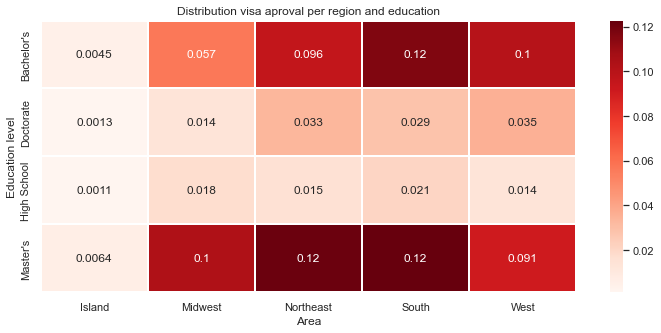

In [54]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_aproved_cross,
    annot=True,
    fmt=".2g",
    cmap='Reds',
linewidths=2, linecolor='white') ##
plt.title('Distribution visa aproval per region and education')
plt.ylabel("Education level")
plt.xlabel("Area")
plt.show()


When analyzing the data of the visa cases approved, we can see a change in proportion in relation with the application data.
Even though the doctorate rate is small when compared with the overall application, it gains weight in the approval chart. We ca not disregard the fact that employees with a doctorate have more possibilities to be granted a visa, since there are more specialized. 
The chart is showing clearly that the regions with more visa cases approved where South and Northeast and also it shows that this granted visas were mostly distributed between master’s and bachelor's holders.


**c.CONTINENT AND VISA STATUS**

How does the visa status vary across different continents?

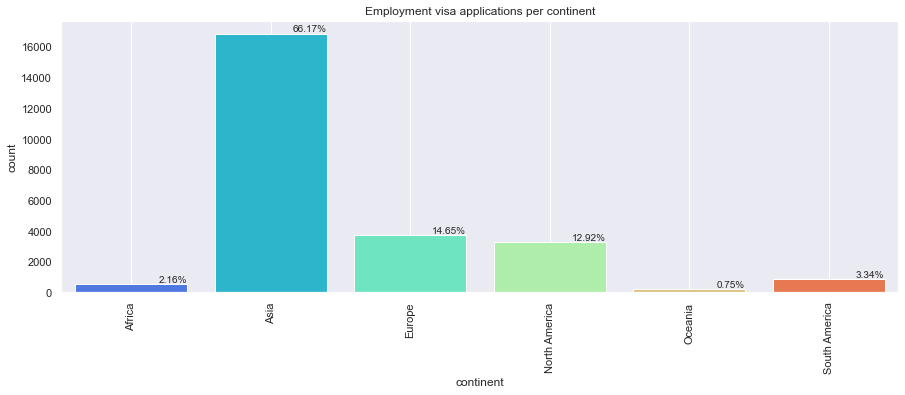

In [55]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['continent'], palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Employment visa applications per continent')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

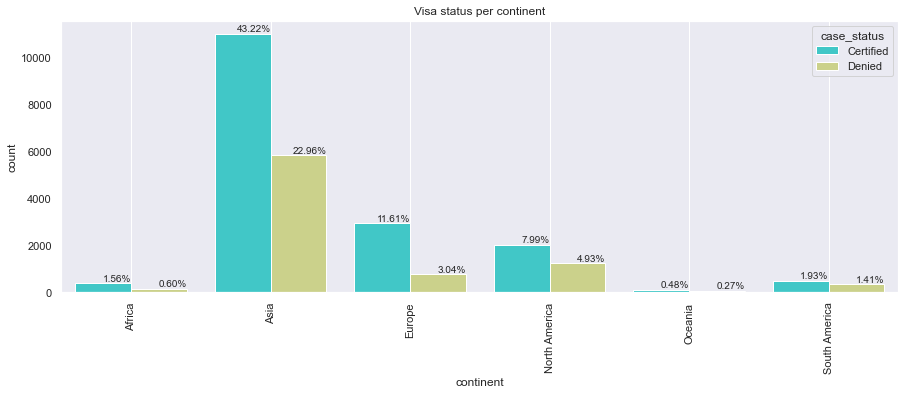

In [56]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['continent'],hue=df['case_status'], palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Visa status per continent')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

In [57]:
#Checking case status per continent
df.groupby('case_status')['continent'].value_counts()

case_status               
Certified    Asia             11012
             Europe            2957
             North America     2037
             South America      493
             Africa             397
             Oceania            122
Denied       Asia              5849
             North America     1255
             Europe             775
             South America      359
             Africa             154
             Oceania             70
Name: continent, dtype: int64

**Rate of acceptance per Continent**

In [58]:
df_ac=df.groupby('case_status')['continent'].value_counts()

In [59]:
# rate acceptance Asia
Rate_asia=df_ac[0]/(df_ac[0]+df_ac[6])*100
Rate_asia=np.round(Rate_asia,2)

In [60]:
# rate acceptance Europe
Rate_Europe=df_ac[1]/(df_ac[1]+df_ac[8])*100
Rate_Europe_=np.round(Rate_Europe,2)

In [61]:
# rate acceptance North America
Rate_North_America=df_ac[2]/(df_ac[2]+df_ac[7])*100
Rate_North_America_=np.round(Rate_North_America,2)

In [62]:
# rate acceptance South America
Rate_South_America=df_ac[3]/(df_ac[3]+df_ac[9])*100
Rate_South_America_=np.round(Rate_South_America,2)

In [63]:
# rate acceptance Africa
Rate_Africa=df_ac[4]/(df_ac[4]+df_ac[10])*100
Rate_Africa_=np.round(Rate_Africa,2)

In [64]:
# rate acceptance Oceania
Rate_Oceania=df_ac[5]/(df_ac[5]+df_ac[10])*100
Rate_Oceania_=np.round(Rate_Oceania,2)


In [65]:
#Create list to add all acceptance rate for different regions
list_acceptance=[Rate_asia,Rate_Europe,Rate_North_America,Rate_South_America,Rate_Africa,Rate_Oceania]


In [66]:
df_acceptance_rate=pd.DataFrame(list_acceptance).T
df_acceptance_rate.columns=['Rate_asia','Rate_Europe','Rate_North_America','Rate_South_America','Rate_Africa','Rate_Oceania']
df_acceptance_rate.index=['percentage']
df_acceptance_rate


,Rate_asia,Rate_Europe,Rate_North_America,Rate_South_America,Rate_Africa,Rate_Oceania
percentage,65.31,79.233655,61.877278,57.86385,72.050817,44.202899


Europe has the greater rate of acceptance with a 79.23 percent, so from each 100 Europeans that apply to the employment visa, 80 of the would be accepted. In second position we can find Africa with 72%, since the number of applicants is so low. In third place we can find Asia with 65 per cent, which is the continent with the highest volume of applicants. North America with 61 per cent of acceptance would be the fourth in the ranking, followed by South Africa and Oceania with 57 and 44 percent rate of acceptance respectively.

**d.JOB EXPERIENCE AND VISA STATUS**

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

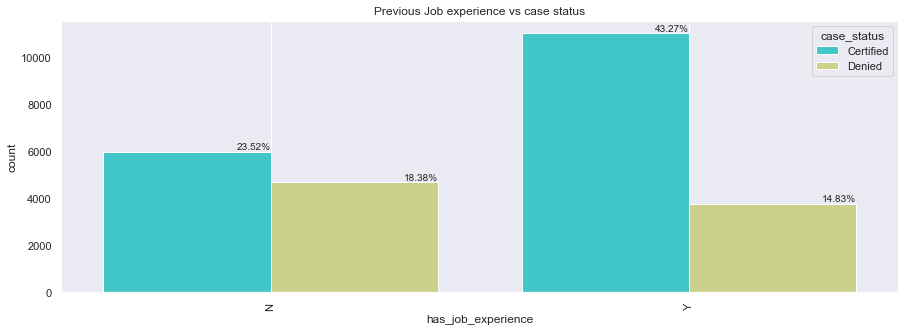

In [67]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['has_job_experience'], hue=df['case_status'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Previous Job experience vs case status')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

From the 66% of the certified applications, 43% of the had previous job experience and only 18% of applicants without previous job experience were certified. Therefore, job experience seems to be a positive factor when it comes to get an employee visa certified.
But obviously, having work experience does not totally determine an employment visa status, since also the 14 % of the experienced applicants with experience were denied.


**Let's check if the work experience can affect the hours of training requirements.**

- **job experience and training needed for the new position**

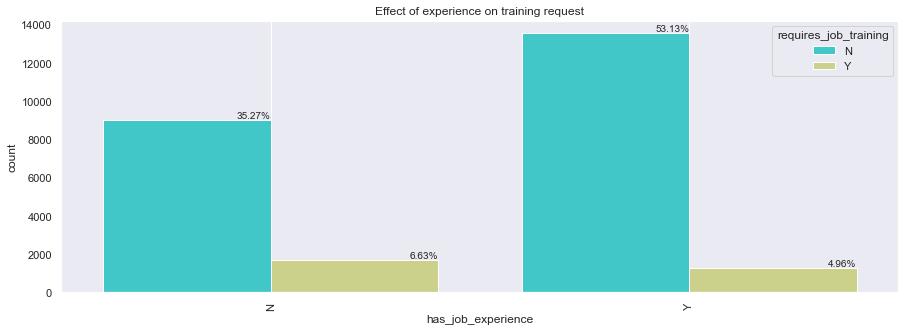

In [68]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['has_job_experience'], hue=df['requires_job_training'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Effect of experience on training request')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

Job experience is not such a relevant factor when it comes to train the new employees. We can see that applicants to the program are not intended to have any initial training for the job; and in fact,  the work experienced employees and the ones without experience are both given the almost the same amount of training when comparing the data in percentage (only 6.63% of prospective employees with no experience are given any previous training to prepare the applicant for the job, while almost 5% of the seasoned applicants would receive training for the position).

**e.UNIT WAGE AND CASE STATUS**

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

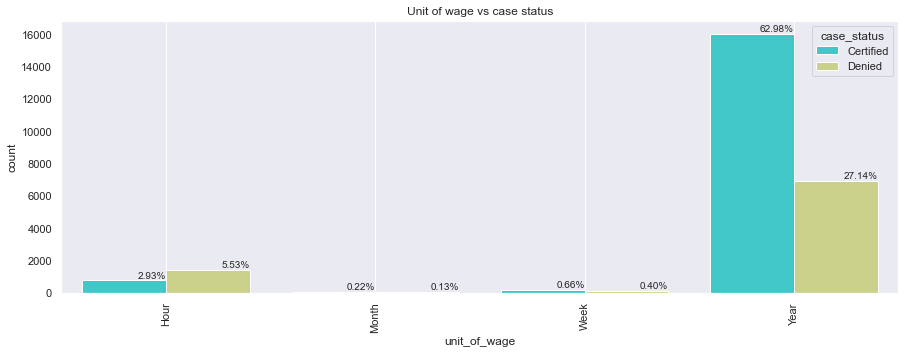

In [69]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['unit_of_wage'], hue=df['case_status'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title('Unit of wage vs case status')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

Most of the applications unit of wage are yearly salary ore hourly rate. The other unit of wage are almost irrelevant because the number of this type of wages are minuscule (only 0.35 and 1.06 percent of the data belong to this unit of wage).

In general, the employment petition expressed on yearly remuneration are related to a higher visa approval rate. The 62.9 percent of the application on certified status were assigned a yearly salary or remuneration.

The hourly rate is the unit of rate associated to higher visa denial, only 2.9 percent of the applicant that were granted a job visa had assigned a hourly rate, which is usually the unit of wage used for low qualified job.


**Let's check if the unit of wage depend on the region of employment, job experience and education.**

- **Unit of wage and job experience**

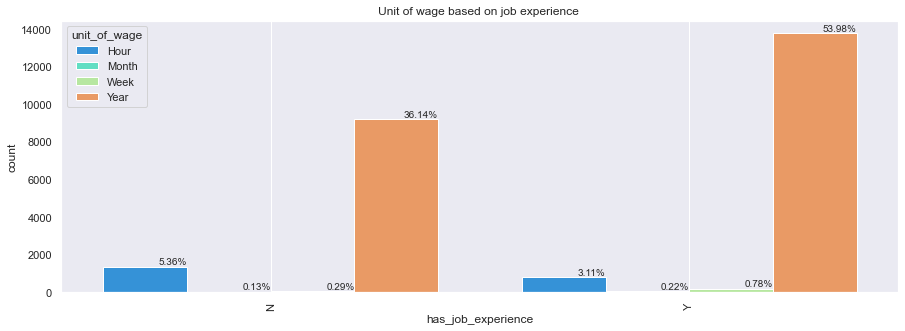

In [70]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['has_job_experience'], hue=df['unit_of_wage'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Unit of wage based on job experience ')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

We can see that applicants without job experience seem to be more often willing to accept an hourly rate. On the other hand, seasoned workers also agree to this type of job contract, but it seems to be more frequent in the case of employees without prior work experience.

- **Unit of wage and education**

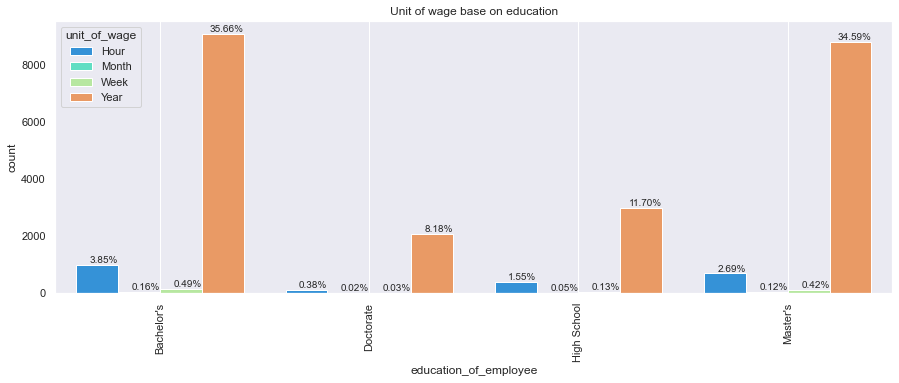

In [71]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['education_of_employee'], hue=df['unit_of_wage'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Unit of wage base on education')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot

Hourly rate is present in all education backgrounds, but bachelor degree holders are the ones presented more frequently with this type of remuneration (3.85%) followed by Masters' degree graduates (2.69%). In last position we find Doctorate holders with only 0.38% of the data..

- **Unit of wage and region of employment**

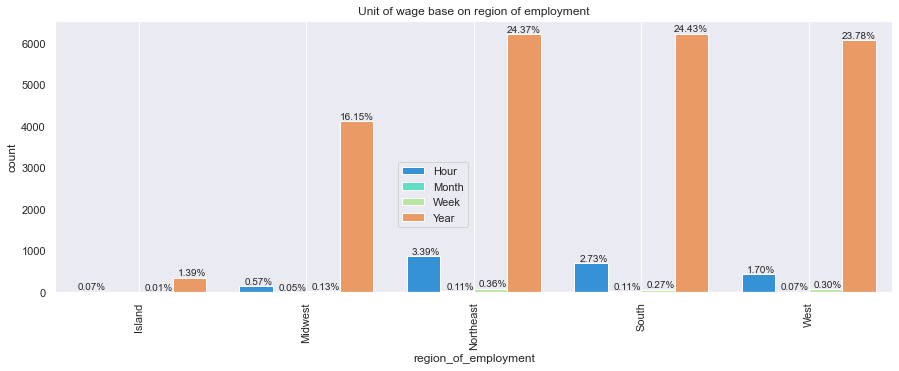

In [72]:
plt.figure(figsize=(15, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x=df['region_of_employment'], hue=df['unit_of_wage'],palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Unit of wage base on region of employment')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
    plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))#legend position

Per regions we can see that the hourly rate is more frequently offered in the Northeast of United States (3.39%), followed by the South and West region with 2.73 per cent and 1.70 percent respectively. Also, weekly rate is more often found on the Northeast area and the West.

**f.PREVAILING WAGE AND CASE STATUS**

 The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Text(0.5, 1.0, 'Case status vs prevailed wage')

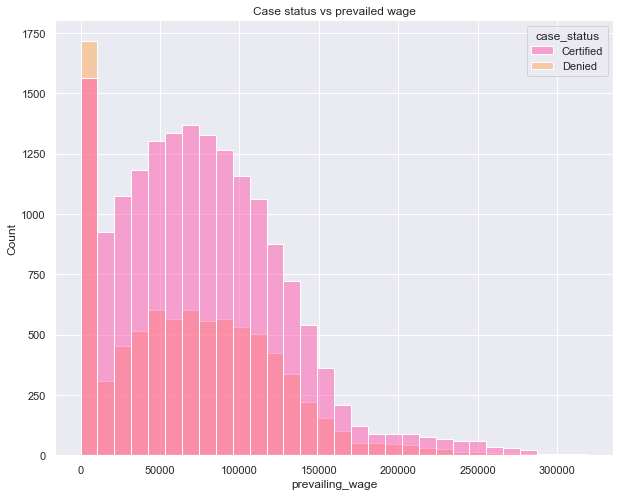

In [73]:
plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x=df['prevailing_wage'],
    hue=df['case_status'],
    palette="spring",bins=30,
    stat="count",
)
plt.title('Case status vs prevailed wage')

In the above graphic representation, we can see that most of the denied and certified are around the lowest values of the distribution, that belong to the hourly prevailing wages. Also, between the brackets 55000 dollars and 80000 seems to be the second pick of application approval. Prevailing wage 50000 dollars seems to hold the second greatest number of denied applications.
This data is difficult to interpret because we do not know what type of unit of wage is referring to, so we will need to complete a further analysis.


<Figure size 864x720 with 0 Axes>

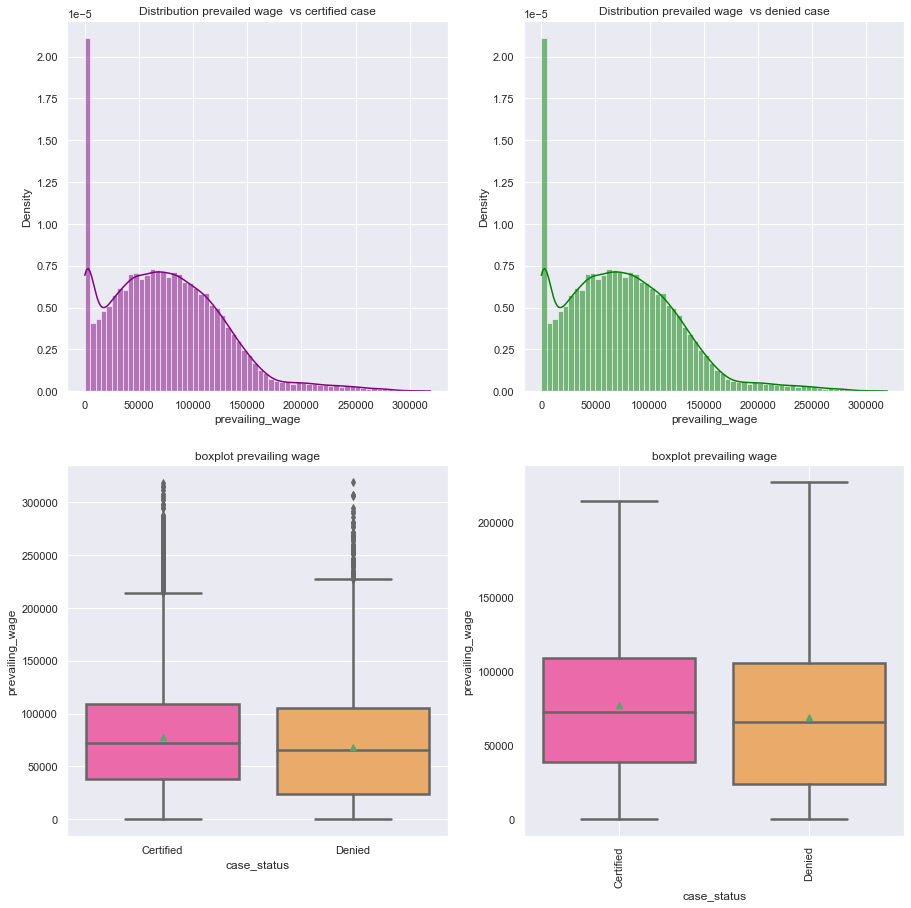

In [74]:
plt.figure(figsize=(12,10))  # size of the plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))#number of columns and rows of subplot

axs[0,0].set_title('Distribution prevailed wage  vs certified case')
sns.histplot(data=df[df['case_status']=='Certified'], x=df['prevailing_wage'],kde=True,  ax=axs[0, 0],stat="density",color="purple")
 # histogram with hue per cerified cases
    
axs[0,1].set_title('Distribution prevailed wage  vs denied case')
sns.histplot(data=df[df['case_status']=='Denied'],x=df['prevailing_wage'],kde=True,  ax=axs[0, 1],stat="density",color="green")
 # histogram  for denied cases
    
axs[1,0].set_title('boxplot prevailing wage')#boxplot with fliers showing mean value
sns.boxplot(data=df, y=df['prevailing_wage'], x=df['case_status'], ax=axs[1, 0], showmeans=True, linewidth=2.5,palette="spring")

axs[1,1].set_title('boxplot prevailing wage')#boxplot without fliers showing mean value
sns.boxplot(data=df, y=df['prevailing_wage'],x=df['case_status'],ax=axs[1, 1], showmeans=True,linewidth=2.5,showfliers=False,palette="spring")

plt.xticks(rotation=90)  # to show the labels in the x axis
plt.grid()
plt.tight_layout
plt.show()

This variable is represented and expressed in such a fashion that is providing with biased information. The lower extreme of the distribution belongs to the prevailed hourly rate and the upper extreme one contains yearly prevailed salaries; how could we compare these values? we may need to separate them in bins to be able to have a better interpretation of the information.

When checking the boxplot, both denied and certified cases show lots of upper outliers, but we can they really be considered outliers, mixing values expressed in hourly pay rate, monthly pay rate, yearly pay rate and weekly pay rate will always provide with biased analysis if we do not pay attention to the difference of units because certainly a yearly salary would be much greater than a monthly value, let alone a hourly rate.
The mean value for the prevailing wage is very similar in denied and certified cases when we do not include the outliers.

**Let's identify the different segment base on the unit of wage**

In [75]:
#creating a sub dataframe to study the variables unit of wage and prevailing wage toguether

df_remuneration=df[['prevailing_wage','unit_of_wage']]

In [76]:
#cheking for the different unit of wage
df_remuneration['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [77]:
#create subdataframe for hour rate analysis
df_hourly=df[df_remuneration['unit_of_wage']== 'Hour']

In [78]:
#create subdataframe for weekly rate analysis
df_weekly=df[df_remuneration['unit_of_wage']== 'Week']

In [79]:
#create subdataframe for monthly rate analysis
df_monthly=df[df_remuneration['unit_of_wage']== 'Month']

In [80]:
#create subdataframe for yearly rate analysis
df_yearly=df[df_remuneration['unit_of_wage']== 'Year']

<Figure size 864x720 with 0 Axes>

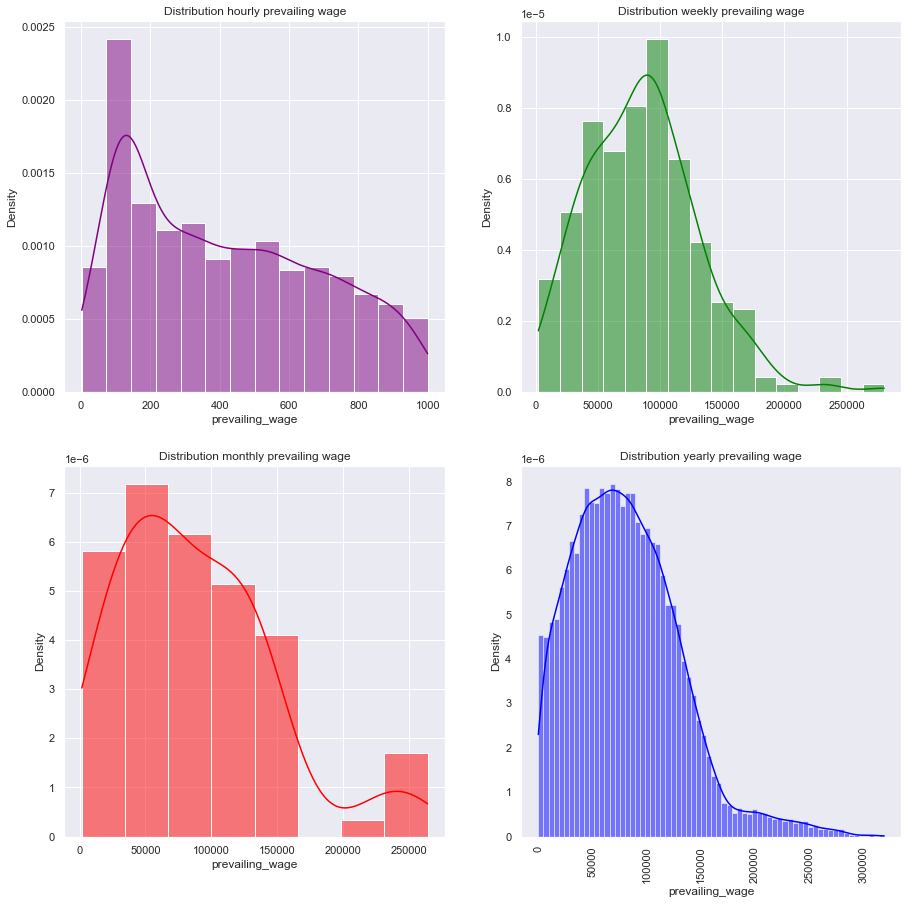

In [81]:
plt.figure(figsize=(12,10))  # size of the plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))#number of columns and rows of subplot

axs[0,0].set_title('Distribution hourly prevailing wage')
sns.histplot(data=df_hourly, x=df_hourly['prevailing_wage'],kde=True,  ax=axs[0, 0],stat="density",color="purple")

    
axs[0,1].set_title('Distribution weekly prevailing wage')
sns.histplot(data=df_weekly,  x=df_weekly['prevailing_wage'],kde=True,  ax=axs[0, 1],stat="density",color="green")

    
axs[1,0].set_title('Distribution monthly prevailing wage')
sns.histplot(data=df_monthly, x=df_monthly['prevailing_wage'] ,kde=True,  ax=axs[1, 0],stat="density",color="red")

axs[1,1].set_title('Distribution yearly prevailing wage')
sns.histplot(data= df_yearly, x=df_yearly['prevailing_wage'],kde=True,  ax=axs[1, 1],stat="density",color="blue")

plt.xticks(rotation=90)  # to show the labels in the x axis
plt.grid()
plt.tight_layout
plt.show()

We can see how each section of the prevailing wage based on the unit of wage has a different distribution. We are analyzing prevailing wage based on unit of wage, so we can find four different segments.

**- Segment hourly wage**

In [82]:
df_hourly['prevailing_wage'].describe()

count    2157.000000
mean      414.570513
std       275.015000
min         2.136700
25%       152.700300
50%       372.652300
75%       637.311100
max       999.919500
Name: prevailing_wage, dtype: float64

The maximum value is near 1000 dollars per hour and the minimum value is 2 dollars per hour. The mean value of this distribution is 414 dollars per hour. It seems that the values equally distributed per quantiles. The extreme upper values are not too far from the 75th quantile and the lower values are not too far from the 25th quantile so we may not have outliers.

From the dataset, 2157 contacts included this tipe or pay rate, most of the time associated to contractual workers or interns.

**- Segment weekly wage**

In [83]:
df_weekly['prevailing_wage'].describe()

count       272.000000
mean      85606.820515
std       44802.704810
min        2183.230000
25%       51408.277500
50%       85075.820000
75%      111331.910000
max      280175.950000
Name: prevailing_wage, dtype: float64

The weekly prevailed wage appears in about 272 cases of the dataset. The weekly wage distribution has some right skewedness, but it seems almost normally distributed, except for the upper values.

The average weekly prevailing wage is 85606 dollars with also some dispersed values as the standard deviation is 44.802 dollars. The minimum week values is 2183 which and the maximum value is 280175, which doubles the 75th percentile.


**- Segment monthly wage**

In [84]:
df_monthly['prevailing_wage'].describe()

count        89.000000
mean      87592.864045
std       59525.124924
min        1599.280000
25%       44986.240000
50%       81826.010000
75%      121629.600000
max      264362.950000
Name: prevailing_wage, dtype: float64

Only 89 employment petitioners included this type of pay rate on the dataset.
The average monthly prevailing wage is 87592 dollars, but the values are a bit disperse since the standard deviation is quite high with respect the mean.
The minimum value is 1599 dollar per month which is small, it may be associated to part time positions. The mean and median values are very close, and it seems that the monthly prevailing wage shape is close to a bell-shaped distribution for the medium values of the distribution, but not for the extremes. In this case we can talk about outliers on the upper extreme of the distribution since the 75th percentile is much smaller than the maximum value of the distribution, therefore the distribution is right skewed.


**- Segment yearly wage**

In [85]:
df_yearly['prevailing_wage'].describe()

count     22962.000000
mean      81228.077133
std       49951.473223
min         100.000000
25%       43715.955000
50%       76174.500000
75%      111341.960000
max      319210.270000
Name: prevailing_wage, dtype: float64

Most of the applications presented a yearly prevailing wage with 22962 petitions of this kind. The average yearly prevailing wage is 81228 dollars. The yearly wage distribution is almost normally distributed except for the upper extreme values. The minimum yearly prevailing wage is 100 dollars which is very small and the maximum value es 319210 dollars, what is the value of three times the 75th percentile, so we can assume the distribution has lots of outliers in the upper whisker.

**Let's check each distribution behavior in base to the case status.**
 

<Figure size 14400x14400 with 0 Axes>

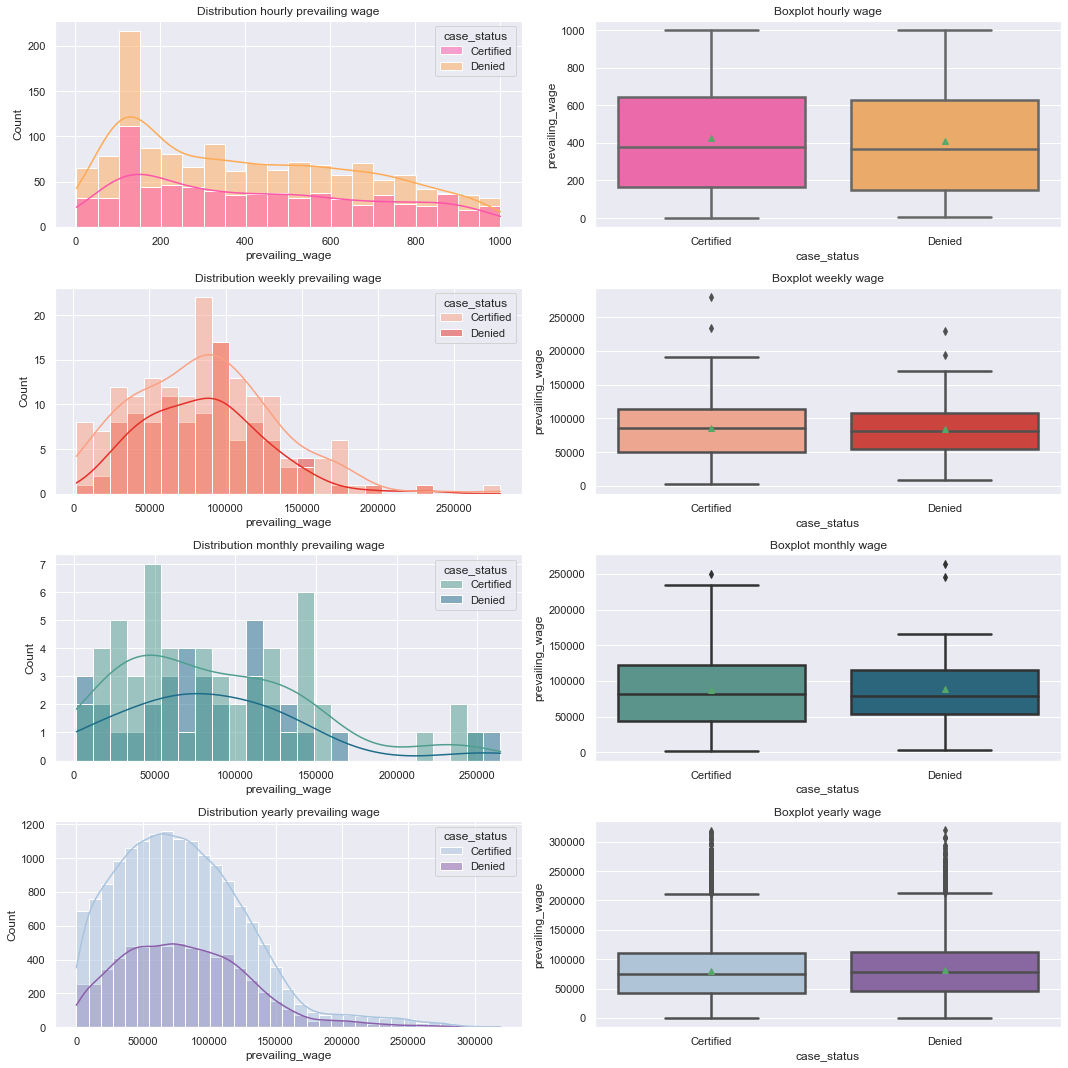

In [86]:

plt.figure(figsize=(200,200))  # size of the plot
fig, axs = plt.subplots(4, 2, figsize=(15,15))#number of columns and rows of subplot

axs[0,0].set_title('Distribution hourly prevailing wage',fontsize=12)# creating histogram for hourly prevailing wage
sns.histplot(data=df_hourly, x=df_hourly['prevailing_wage'],hue=df_hourly['case_status'],bins=20,kde=True,  ax=axs[0, 0],stat="count",palette="spring")

axs[0,1].set_title('Boxplot hourly wage',fontsize=12)#boxplot with fliers showing mean value
sns.boxplot(data=df_hourly, y=df_hourly['prevailing_wage'], x=df_hourly['case_status'], ax=axs[0, 1], showmeans=True, linewidth=2.5,palette="spring")

axs[1,0].set_title('Distribution weekly prevailing wage',fontsize=12)#creating histogram for weekly prevailing wage
sns.histplot(data=df_weekly,  x=df_weekly['prevailing_wage'],bins=25, hue=df_weekly['case_status'],kde=True,  ax=axs[1, 0],stat="count",palette="Reds")
axs[1,1].set_title('Boxplot weekly wage',fontsize=12)#creating histogram for weekly prevailing wage
sns.boxplot(data=df_weekly, y=df_weekly['prevailing_wage'], x=df_weekly['case_status'], ax=axs[1, 1], showmeans=True, linewidth=2.5,palette="Reds") 

axs[2,0].set_title('Distribution monthly prevailing wage',fontsize=12)#creating histogram for montly prevailing wage
sns.histplot(data=df_monthly, x=df_monthly['prevailing_wage'],bins=25,hue=df_monthly['case_status'],kde=True,  ax=axs[2, 0],stat="count",palette="crest")

axs[2,1].set_title('Boxplot monthly wage',fontsize=12)#boxplot with fliers showing mean value
sns.boxplot(data=df_monthly, y=df_monthly['prevailing_wage'], x=df_monthly['case_status'], ax=axs[2, 1], showmeans=True, linewidth=2.5,palette='crest')

axs[3,0].set_title('Distribution yearly prevailing wage',fontsize=12)#creating histogram for yearly prevailing wage
sns.histplot(data= df_yearly, x=df_yearly['prevailing_wage'],hue=df_yearly['case_status'],bins=35,kde=True,  ax=axs[3, 0],stat="count",palette="BuPu")

axs[3,1].set_title('Boxplot yearly wage', fontsize=12)#boxplot with fliers showing mean value
sns.boxplot(data=df_yearly, y=df_yearly['prevailing_wage'], x=df_yearly['case_status'], ax=axs[3, 1], showmeans=True, linewidth=2.5,palette="BuPu")             

plt.tight_layout()
plt.show()

For the hourly prevailing wage, the wage that counts with more certified applications are in the bracket of 100 and 150 dollars per hour, but also this is the bracket with more denied applications. In terms of proportions certified vs denied per prevailing wage, we can see that most of the cases of the upper extreme, from 800 per hour or more, have been accepted and this is even more noticeable in the bracket 850 to 900 dollars per hour. The average rate for both, denied and approved applications is 400 dollars a week.

The weekly wage 80000 to 90000 seems to be the most frequent for the weekly prevailing wages, but also the ones with higher approval rate. Applications with a prevailing wage around 100000 are more often denied. Also, applications with a low prevailing wage are more often approved. Average values for denied and approved applications are similar, near 85000 dollars per week.

For the monthly prevailing wage, the maximum approval is reach around the 50000 dollars a month followed by 140000 dollars per month. Maximum amount of denied cases appear associated to monthly wages near 120000 dollar per month. For this group, also average denied prevailing wage and certified prevailing wage are near 87000 dollar a month.

The yearly prevailing wage group is the most frequently found in the data set. The pick of approved and denied cases can be found near values 60000 and 70000 dollar. For this group, the mean values for certified and denied cases is also near 80000 dollar a year.


**g. PREVAILING WAGE AND CASE STATUS BASE ON REGION OF EMPLOYMENT**

Text(0.5, 1.0, 'Region vs prevailed wage')

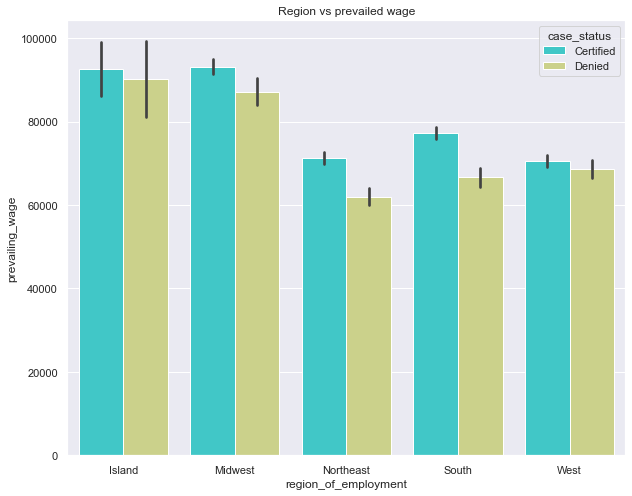

In [87]:
plt.figure(figsize=(10,8))#set size of the plot
sns.barplot(
    data=df,
    y='prevailing_wage',
    x='region_of_employment',
    hue='case_status', palette='rainbow'
)#create barplot with average values and ci that shows the standard deviation per region and cases certified and denied
plt.title('Region vs prevailed wage')#add title

The average prevailed value for the Midwest region seems to be the highest followed by the Island area. The difference is minimal, but the values are more spread in the Island region where we can find higher prevailing wage, especially if we compare both areas in terms of average wage for denied cases.

West average prevailing wage is the lowest, slightly lower than Northeast region. When we compare the wage in both areas, the Northeast denied cases present much lower wage than any other area.

Region South is the third in terms of average prevailing wage and the second region with the lowest prices for the denied cases.

We can assume the state used different prevailing wages depending on need of workforce needed in a certain area. 


**h.FULL TIME AND CASE STATUS**

Text(0.5, 1.0, 'Full time position and application case status')

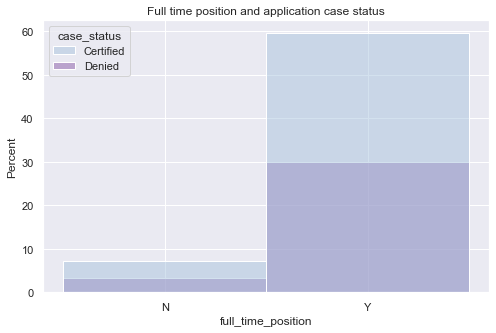

In [88]:
plt.figure(figsize=(8,5))#set size
sns.histplot(
    data=df,
    x=df['full_time_position'],
    hue=df['case_status'],stat='percent', palette='BuPu'
)#creating a plot showing percentage of denied cases and approved based on type of contract: full time or other type
plt.title('Full time position and application case status')#add title

The case status per full time graphic representation shows that most of the certified application correspond to full time positions.
Only around 8 percent of application with a different type of contract are certified.



**i.NUMBER OF EMPLOYEES AND CASE STATUS**

Text(0.5, 1.0, 'Number of employees and case status')

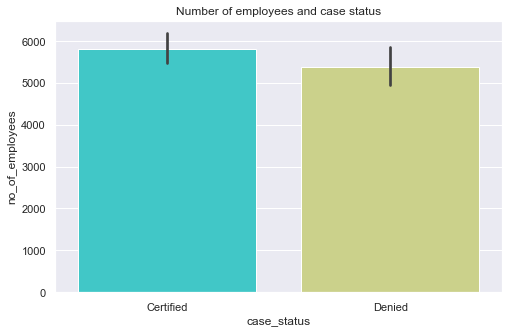

In [89]:
plt.figure(figsize=(8,5))#set size of the plot
sns.barplot(
    data=df,
    y='no_of_employees',
    x='case_status', palette='rainbow'
)#create barplot with average values of number of employees and case status
plt.title('Number of employees and case status')#add title

Companies with more employees, in the range of 5500 and 6000 people, tend to have more certified cases

**j. YEAR OF COMPANY ESTABLISHMENT AND CASE STATUS**

Text(0.5, 1.0, 'Year company was founded and application case status')

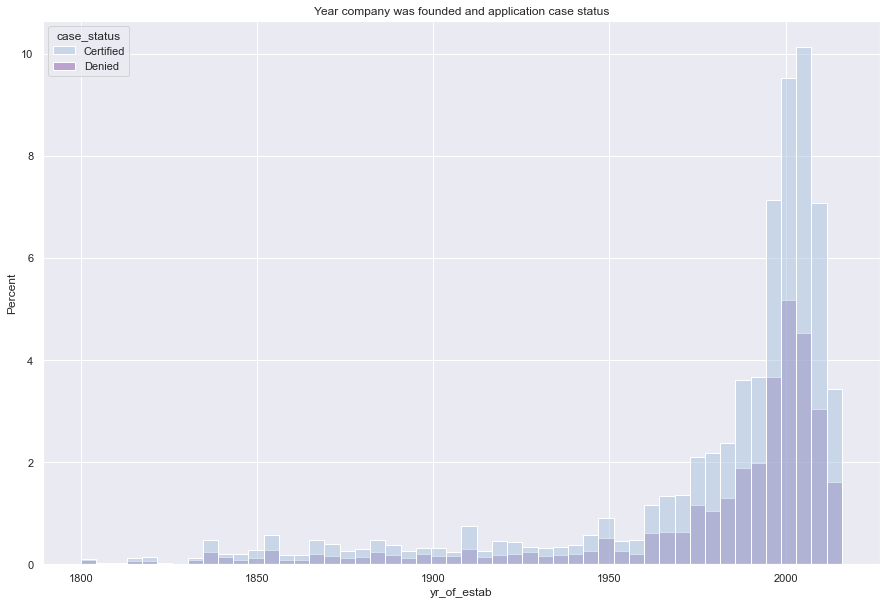

In [90]:
plt.figure(figsize=(15,10))#set size
sns.histplot(
    data=df,
    x=df['yr_of_estab'],
    hue=df['case_status'],stat='percent', palette='BuPu',bins=50
)#creating a plot showing percentage of denied cases and approved based on type of contract: full time or other type
plt.title('Year company was founded and application case status')#add title

We can see how companies created in the early 2000 are the ones that request more foreign employees; therefore, the ones granted the maximum amount of certified status and the ones also with more denied cases. There is a technological field that developed in the early 2000 associated to data, Internet, and ecommerce, that required specialized knowledge.

## 4. Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### 4.1 Checking outliers for the numeric variables

In [91]:
# creating a list with all the numeric variables to plot outliers.
list_outlier = df.select_dtypes(np.number).columns.tolist()
list_outlier

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

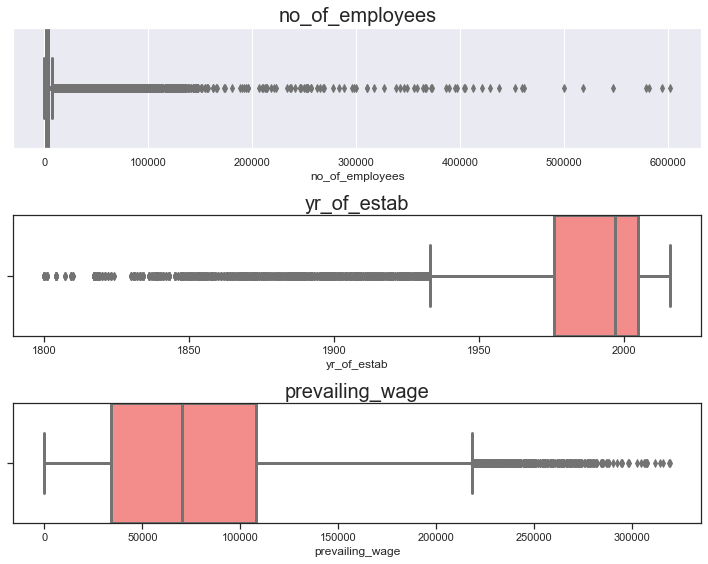

In [92]:
# we specify the variables which outliers we want to check by creating a list and then by using a for loop we can use the boxplot.

plt.figure(figsize=(10, 8))

for i in range(len(list_outlier)):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(
        x=df[list_outlier[i]],
        whis=1.5,
        palette="spring",
        linewidth=3,
        saturation=0.8,
        width=1,
    )
    plt.title(list_outlier[i], fontsize=20)
    sns.set_theme(style="ticks")
    plt.tight_layout()
    plt.show

We can see the three variables have outliers according to their respective boxplot. We are not treating outliers this time because number of employees and year of establishment are discrete variables. In the case of prevailing wage, we could treat the variable for outliers since it is a continuous distribution, but we are not treating them since the different values are part of the application process and it could affect the model.

### 4.2 Data engineering


In [93]:
#change target values to numeric (denied-0, certified-1)
df['case_status']=df['case_status'].replace(['Certified', 'Denied'],[1,0])


In [94]:
#check for categorical variables in the dataframe to create dummies
df.select_dtypes('category').columns.tolist()

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [95]:
#Create dummies

df=pd.get_dummies(df,drop_first=True)

**EDA AFTER DATA ENGINEERING**

- It is a good idea to explore the data once again after manipulating it.

In [96]:
df['case_status'].unique()

array([0, 1], dtype=int64)

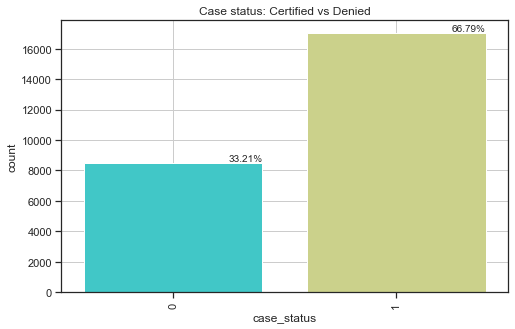

In [97]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot (data=df,x='case_status' , palette='rainbow')  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title( 'Case status: Certified vs Denied')  #add title
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

In [98]:
#visualizing the new dataset with dummy variables
df.head().T

,0,1,2,3,4
no_of_employees,14513.0000,2412.00,44444.00,98.00,1082.00
yr_of_estab,2007.0000,2002.00,2008.00,1897.00,2005.00
prevailing_wage,592.2029,83425.65,122996.86,83434.03,149907.39
case_status,0.0000,1.00,0.00,0.00,1.00
continent_Asia,1.0000,1.00,1.00,1.00,0.00
continent_Europe,0.0000,0.00,0.00,0.00,0.00
continent_North America,0.0000,0.00,0.00,0.00,0.00
continent_Oceania,0.0000,0.00,0.00,0.00,0.00
continent_South America,0.0000,0.00,0.00,0.00,0.00
education_of_employee_Doctorate,0.0000,0.00,0.00,0.00,0.00


### 4.3 Preparing data for modeling

In [99]:
# dividing dataset in target (y) variable and predictors(x

x=df.drop('case_status',axis=1 )
y=df['case_status']

In [100]:
#checking data type for each predictor, all values are numeric type
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  int64  
 2   prevailing_wage                    25480 non-null  float64
 3   continent_Asia                     25480 non-null  uint8  
 4   continent_Europe                   25480 non-null  uint8  
 5   continent_North America            25480 non-null  uint8  
 6   continent_Oceania                  25480 non-null  uint8  
 7   continent_South America            25480 non-null  uint8  
 8   education_of_employee_Doctorate    25480 non-null  uint8  
 9   education_of_employee_High School  25480 non-null  uint8  
 10  education_of_employee_Master's     25480 non-null  uint8  
 11  has_job_experience_Y               25480 non-null  uin

In [101]:
#Checking the proportions of certified(1) and denied data(0)
y.value_counts(normalize=True)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

We can see that the data in the target variable is imbalanced so we need to use the parameter stratify during the process of splitting data in train and test set, to make sure there are the same proportions in both sets.

In [102]:
#dividing the data in training and test set on a ration 70:30. We use the parameter stratify to deal with imbalanced data

x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=1, stratify=y)

In [103]:
x_train.shape
print(f'x_train contains {x_train.shape[0]} rows and {x_train.shape[1]} columns')

x_train contains 17836 rows and 21 columns


In [104]:
x_test.shape
print(f'x_test contains {x_test.shape[0]} rows and {x_test.shape[1]} columns')

x_test contains 7644 rows and 21 columns


In [105]:
y_train.shape
print(f'y_train contains {y_train.shape[0]} rows')


y_train contains 17836 rows


In [106]:
y_test.shape
print(f'y_test contains {y_test.shape[0]} rows')

y_test contains 7644 rows


### 4.4 Data evaluation and performance

We need to create a model that can perform a correct classification of the case status. In order to do so, we need to c minimize the misclassifications of the data (type I error and type II error).

Type I error (false positive): This misclassification would happen if an application does not qualify for visa and the model assigns certified status.

Type II error (false negative): This error would happen if the application qualified for certify status, but the model assigns denied status.

**What would it be more damaging to the application system? **

In this case, both errors are equally damaging to the system.

In the type I error situation, the model would create a situation in which the applicant to the program would be granted the visa approval but do not meet the requirements. This misclassification would create a butterfly effect because this applicant would take the place of another qualified one, due limited number of employment visas available per year.

In the type II error situation, a qualified prospective employee would be denied permission to work in the country and this would mean that a talented individual would not be able to contribute to an American company, missing opportunities to generate economical and intellectual growth in the society.

**What would be our measure of performance?**

We are going to focus on f1_score.  f1_score should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly. F1_score assigns a proportional importance to recall and precision: 
- Recall will tell us from the actual data, how many true certified cases we could identify.
- Precision will tell us from the cases that we considered certified, how many are actually certified.

**MODEL PERFORMANCE: Creating a function to check classification model performance** 

In [107]:
# user defined performance function to check model performance for each model.

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute accuracy, recall, precision and f1
    model: classifier
    predictors: independent variables (x)
    target: dependent variable (y)
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    accuracy = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score


    # creating a dataframe to store performance metrics
    df_perf = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


## 5.Creating a model

### 5.1 Decision tree model

We are creating our first model as a simple decision tree classifier and we will check performance and confusion matrix. 

In [108]:
#creating a decision tree classifier with weight class parameter to fix the imbalanced data.

Dtree=DecisionTreeClassifier( criterion="gini", random_state=1, class_weight={0:0.67 ,1:0.33 })
#fitting train data
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

**Model performance**

In [109]:
#Let's check performance of the decision tree model on train set

perf_Dtree_train=model_performance_classification_sklearn(Dtree, x_train, y_train)
perf_Dtree_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [110]:
#Let's check performance of the decsion tree model on test set

perf_Dtree_test=model_performance_classification_sklearn(Dtree, x_test, y_test)
perf_Dtree_test

,Accuracy,Recall,Precision,F1
0,0.653715,0.749265,0.73671,0.742935


Dtree model is overfitted. The model performs much better on the train set than on test set. The metrics are all equal to 1 what is a clear indicator of overfitting, this model is caching noise so it will need to be improved.

**Confusion matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

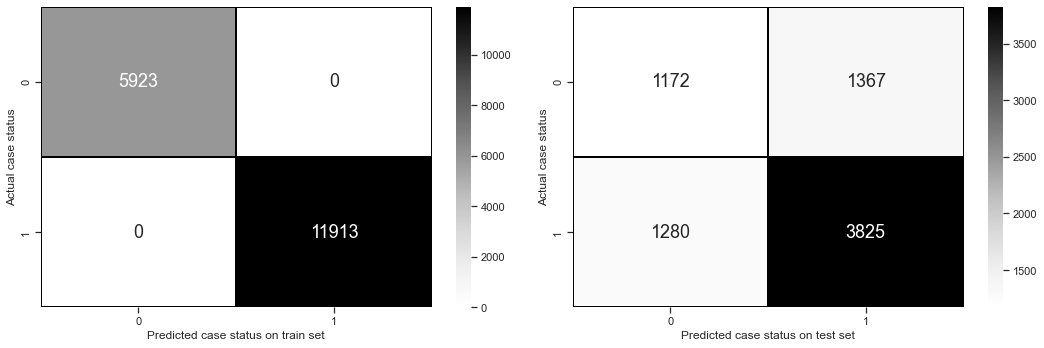

In [111]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Dtree = Dtree.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Dtree)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="", cmap='Greys',linewidths=2, linecolor='black',annot_kws={"size": 18} )#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Dtree = Dtree.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Dtree)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",cmap='Greys',linewidths=2, linecolor='black',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [112]:
error_train_matrix_perc = (0+ 0) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(error_train_matrix_perc,2)}%")

 The total error for train data is 0.0%


In [113]:

error_test_matrix_perc = (1367 + 1280) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(error_test_matrix_perc,2)}%")

 The total error for test data is 34.63%


Obviously there is a huge discrepancy between the test and train set performance. This model is not predicting well on the test set.

## 6. Building bagging and boosting models

Bagging and boosting are ensemble techiniquest that improve simple models. They work on a conbination of weake learners to make a stronger model.

###  6.1 BAGGING

####  6.1.1 BAGGING, MODEL BAGG

In bagging, we are using different decision trees that are weak learners but independents ones from the others. Bagging as ensemble technique permits to create a strong model by combining the results of all weak learners. If the model is a classification model like this one, the final model will be decided by voting, the classification that more frequently of the weak learners assigned would be the one used for the final model ( in regressions, not our current case, the final model would be an average of the other weak learners). Bagging techniques help to reduce the variance of the models.

In [114]:
#Selecting a simple bagging classifier With class weight to fix the imbalance data. We are using a decision tree as base estimator
Bagg=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67 ,1:0.33},random_state=1),random_state=1)
#fitting 
Bagg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

**Model performance Bagg model**

In [115]:
#Checking performance of the  Bagging decision tree model on train set

perf_Bagg_train=model_performance_classification_sklearn(Bagg, x_train, y_train)
perf_Bagg_train

,Accuracy,Recall,Precision,F1
0,0.985479,0.987241,0.990984,0.989109


In [116]:
#Checking performance of the Bagging decision tree model on test set

perf_Bagg_test=model_performance_classification_sklearn(Bagg, x_test, y_test)
perf_Bagg_test

,Accuracy,Recall,Precision,F1
0,0.695709,0.778844,0.768606,0.773691


This model is a bit better than Dtree (initial decision tree model) but the performance on train set is much better than on test set. The f1_score is not bad on test set with 0.77 but f1_score on train set is 0.98, so we can see the model is doing much better on train set as a sign of overfitting. 
Accuracy is also better for the train set very close to 0.99  and very far for he test set metric with 0.69.

**Confusion matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

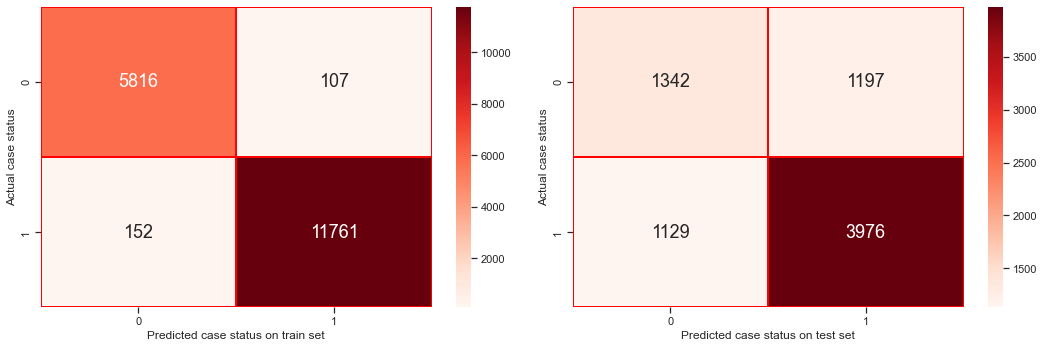

In [117]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Bagg = Bagg.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Bagg)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Bagg = Bagg.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Bagg)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [118]:
bagg_error_train_matrix_perc = (152+107) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(bagg_error_train_matrix_perc,2)}%")

 The total error for train data is 1.45%


In [119]:
bagg_error_test_matrix_perc = (1129+1197) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(bagg_error_test_matrix_perc,2)}%")

 The total error for test data is 30.43%


The type I and type II error for the test set is about 30%, and only 1.45% for the train set. This model in not good to predict on test set and also is overfitted.

#### 6.1.2 RANDOM FOREST, MODEL RF

Random forest is a type of bagging in which we limit the number of features that we are using each time we create a learner, so it helps built independence and help with overfitting. In random forest the learners are all decisiont trees.
Because the targe variable is imbalanced, we are going to use the class_weight parameters to give more weight to the class with lower weight.

In [120]:
# create a classifier with class_weight parameter and using gini as criteria for impurity 

RF=RandomForestClassifier(criterion='gini', class_weight={0:0.67 ,1:0.33}, random_state=1)
#fitting the ramdom forest classifier
RF.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

**Performance model RF-random forest model**

In [121]:
#Checking performance of the random forest decision tree model on train set

perf_RF_train=model_performance_classification_sklearn(RF, x_train, y_train)
perf_RF_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [122]:
#Checking performance of the random forest decision tree model on test set

perf_RF_test=model_performance_classification_sklearn(RF, x_test, y_test)
perf_RF_test

,Accuracy,Recall,Precision,F1
0,0.723182,0.842703,0.766162,0.802612


On test set, accuracy is 0.72, f1_score is 0.80 what is a decent result, so RF model is predicting better on test set than the previous one (Bagg) but on the train set all the metrics are reaching the maximum value, 1, so the model is overfitted.
Metrics on both set are between 20 to 30 points apart what means this is not a good model.


**Confusion matrix for RF**

<function matplotlib.pyplot.show(close=None, block=None)>

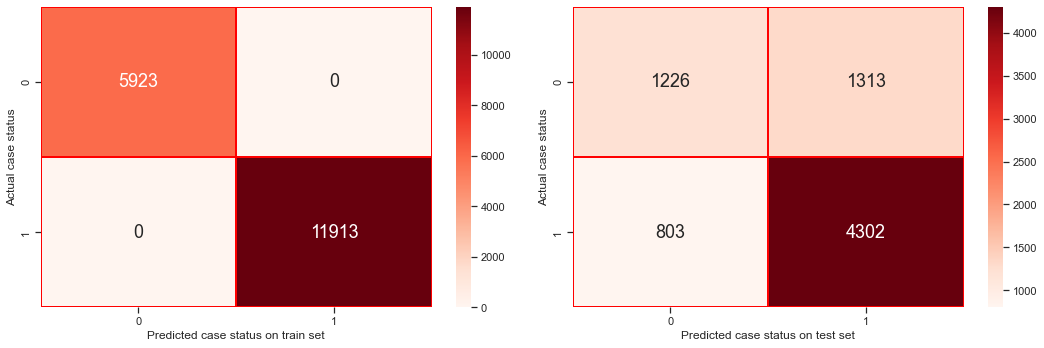

In [123]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_RF = RF.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_RF)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_RF = RF.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_RF)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [124]:
RF_error_train_matrix_perc = (0+0) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(RF_error_train_matrix_perc,2)}%")

 The total error for train data is 0.0%


In [125]:
RF_error_test_matrix_perc = (803+1313) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(RF_error_test_matrix_perc,2)}%")

 The total error for test data is 27.68%


The RF model seems to reduce the overall classification error (type I and type II) on the test set, reaching a 27% what it is still high but better than the previous one. On the other hand, the model is obviously overfitted since the train set has not error whatsoever, a clear indication of noise in the model.

### 6.2 BOOSTING

Boosting a different kind of ensemble technique, where the models, weak learners, work on the improvement of the previous model. This type of ensemble technique will build the models sequentially.

#### 6.2.1 ADABOOSTING

Adaboosting technique creates learners in sequence improving the classification of the next models by assigning more weight to the values of the dataset that were misclassified in the previous model and lowering the weight of the ones properly classified. 

In [126]:
#creating a classifier
Ada= AdaBoostClassifier(random_state=1)
#fit data on the model
Ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

**Performance model Ada, Adaboosting technique**

In [127]:
#Checking performance of the Adaboosting decision tree model on train set

perf_Ada_train=model_performance_classification_sklearn(Ada, x_train, y_train)

perf_Ada_train

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


In [128]:
#Checking performance of the Adaboosting  model on test set

perf_Ada_test=model_performance_classification_sklearn(Ada, x_test, y_test)
perf_Ada_test

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


This model seems to be doing good on both sets. the f1_score is decent with 0.81, and accuracy could be a bit better but metric results on train and test set are very close so that make the model more robust.

**Confusion matrix for Ada model**

<function matplotlib.pyplot.show(close=None, block=None)>

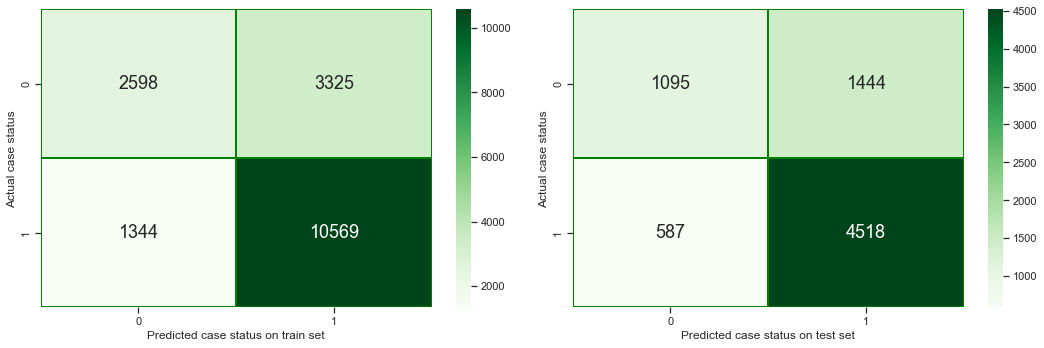

In [129]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Ada = Ada.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Ada)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Ada = Ada.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Ada)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [130]:
Ada_error_train_matrix_perc = (1344+3325) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(Ada_error_train_matrix_perc,2)}%")

 The total error for train data is 26.18%


In [131]:
Ada_error_test_matrix_perc = (587+1444) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(Ada_error_test_matrix_perc,2)}%")

 The total error for test data is 26.57%


The confusion matrix for both train and test set are showing similar overall error in proportion. Total error is around 26% which is very high as we saw accuracy was not excellent but both errors are very close to the model is predicting better than the other ones since there is not overfitting on this one.  Certainly, there is room for improvement, and the adding hyperparameters could help to get better results.

#### 6.2.2 GRADIENT BOOSTING

Gradient boosting is another boosting technique that creates sequential models and try to enhance the previous model by working with the residuals.As adaboosting, this is good to fixed biased models.

In [132]:
#creating a gradient boosting clasifier
GB=GradientBoostingClassifier(random_state=1)
#fitting the data
GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

**Performance model GB, Gradient boosting technique**

In [133]:
#Checking performance of the GB model on train set

perf_GB_train= model_performance_classification_sklearn(GB, x_train, y_train)
perf_GB_train

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


In [134]:
#Checking performance of the GB model on test set

perf_GB_test=model_performance_classification_sklearn(GB, x_test, y_test)
perf_GB_test

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


This model has better prediction power than the previous one, accuracy is near 0.75 what is a bit better than the adaboosting model and f1_score is also improved a bit in both training and testing sets. In regards with the metrics, in both sets the results are very close so it is a good sign, it means that the model is not overfitting.to fixed biased models,

**Confusion matrix for GB model**

<function matplotlib.pyplot.show(close=None, block=None)>

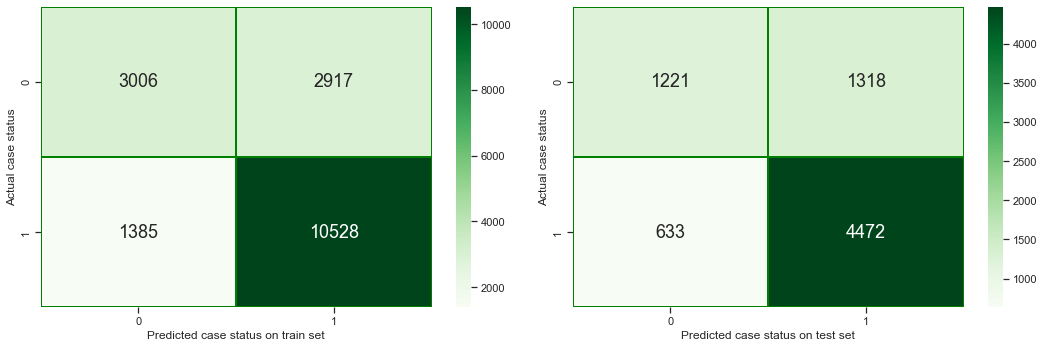

In [135]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_GB = GB.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_GB)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_GB = GB.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_GB)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [136]:
GB_error_train_matrix_perc = (1385+2917) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(GB_error_train_matrix_perc,2)}%")

 The total error for train data is 24.12%


In [137]:
GB_error_test_matrix_perc = (633+1318) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(GB_error_test_matrix_perc,2)}%")

 The total error for test data is 25.52%


The overall error went down for both training and test set. The confusion matrix confirm the performance results for the model GB, with lower misclassification error than any of the previous models.

#### 6.2.3 XG BOOST

XG boost ensemble technique takes the basics of the Gradient boosting technique, but it is a better version with features that allows the learners to be built in parallel even though it is an option for any of the other boosting methods. The implementation of this technique just makes it more powerful.

In [138]:
#creating a XG boosting classifier with the basic paramenters
XGB=XGBClassifier(random_state=1,eval_metric='logloss')
#fitting the model on train sets
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

As we can see, xg boost default parameters apperar above. The classifier has assigned equal weight to both class of the target variable, the lerning rate is 0.3, the maximum depth of the tree is 6 and the number of trees created is 100.

**Performance model XGB**

In [139]:
#Checking performance of the XGB model on train set

perf_XGB_train= model_performance_classification_sklearn(XGB, x_train, y_train)
perf_XGB_train

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


In [140]:
#Checking performance of the XGB  model on test set

perf_XGB_test=model_performance_classification_sklearn(XGB, x_test, y_test)
perf_XGB_test

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


This model is doing great on the training set but not as good on the test set. Test set performance is fine, but there is a gap between metrics results for both training and validation set; this model is overfitting.

**Confusion  matrix for XGB**

<function matplotlib.pyplot.show(close=None, block=None)>

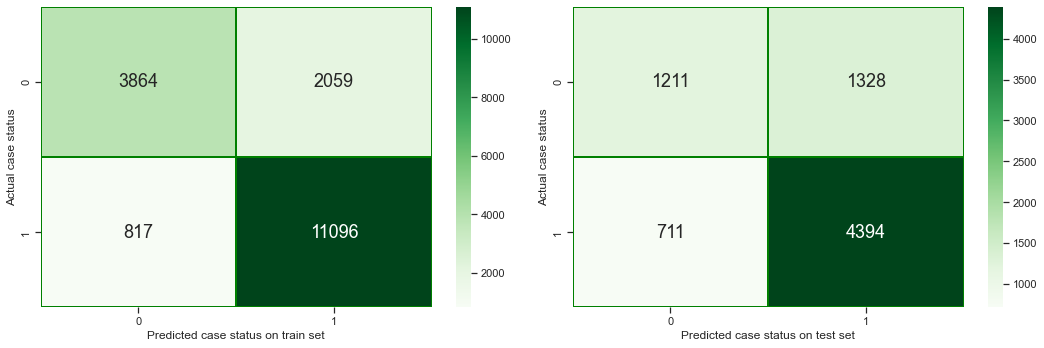

In [141]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_XGB = XGB.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_XGB)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_XGB = XGB.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_XGB)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [142]:
XGB_error_train_matrix_perc = (817+2059) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(XGB_error_train_matrix_perc,2)}%")

 The total error for train data is 16.12%


In [143]:
XGB_error_test_matrix_perc = (711+1328) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(XGB_error_test_matrix_perc,2)}%")

 The total error for test data is 26.67%


As we could see on the model performance section, the XGB model works better on the training set. XGB must be capturing some noise because the model is overfitting.
The error on the testing set is 10 percentage points above the training set overall error according to the results of both confusion matrices.


### 6.3 STACKING

Stacking is an ensemble technique that works with heterogeneous models. It is call staking because it creates weak learners with a subset of the train dataset and combine them by using another metamodel. Stacking is good to improve predictions.

In [144]:
estimator = [('Adaboost',Ada), ('Gradient Boosting',GB), ('Decision Tree',Dtree)]# initial learners
Final_estimator=XGB #meta model to combine the initial learners
#creating stacking classifier
Stack=StackingClassifier(estimators=estimator, final_estimator=Final_estimator)
#fitting the model
Stack.fit(x_train,y_train)

StackingClassifier(estimators=[('Adaboost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1,
                                                 e...
                                                 importance_type=None,
                                            

**Performance Stack model**

In [145]:
#Checking performance of the Stack model on train set

perf_Stack_train= model_performance_classification_sklearn(Stack, x_train, y_train)
perf_Stack_train

,Accuracy,Recall,Precision,F1
0,0.763512,0.886091,0.786763,0.833478


In [146]:
#Checking performance of the Stack model on test set

perf_Stack_test= model_performance_classification_sklearn(Stack, x_test, y_test)
perf_Stack_test

,Accuracy,Recall,Precision,F1
0,0.736787,0.866014,0.769003,0.814631


Stack model seems to be working good on both train and test data. F1_score shows good performance with 0.83 on train set and 0.81 on test set. The accuracy is decent in both training and validation data (0.76 and 0.76 respectively)and the model is doing great on recall, capturing type I error better than type II. Precision is decent as well with around 0.75 for both sets.

**Confusion matrix for Stack model**

<function matplotlib.pyplot.show(close=None, block=None)>

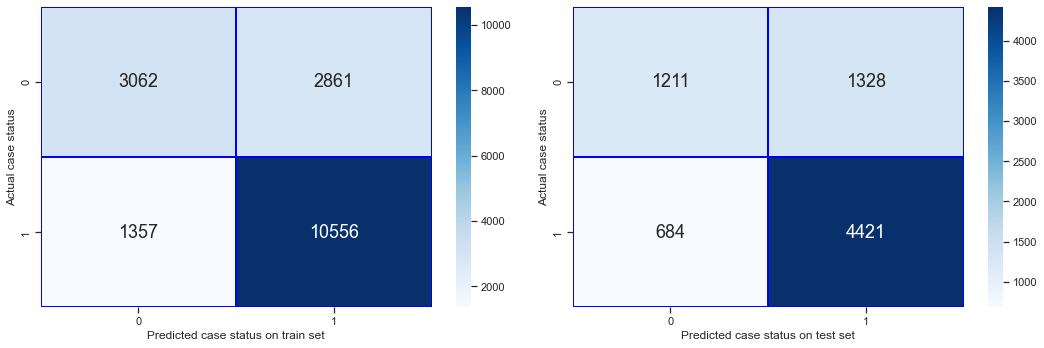

In [147]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Stack = Stack.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Stack)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='blue',cmap='Blues',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Stack = Stack.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Stack)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='blue',cmap='Blues',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [148]:
Stack_error_train_matrix_perc = (1357+2861) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(Stack_error_train_matrix_perc,2)}%")

 The total error for train data is 23.65%


In [149]:
Stack_error_test_matrix_perc = (684+1328) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(Stack_error_test_matrix_perc,2)}%")

 The total error for test data is 26.32%


The confusion matrices are showing how the data performs slightly better on train set than on train set. The stack model performance is decent and as we could see before, recall is the metric that works best for this model. We can still improve it by using different learners with tunning.

##  7. Will tuning the hyperparameters improve the model performance?

Let's see if by tunning the hyperparamentes for each model we get better performance.

#### 7.1 Decicion Tree model- DTree_tuned

In [150]:
# classifier with class_weight to balance the targe data
DTree_tuned= DecisionTreeClassifier( criterion="gini", random_state=1, class_weight={0:0.67 ,1:0.33 })
parameters={'max_depth': np.arange(2,20), 
              'min_samples_leaf': [ 2, 5, 10],
              'max_leaf_nodes' : [ 5, 10,15],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(DTree_tuned ,parameters, scoring=scorer)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

DTree_tuned= grid_obj.best_estimator_#find the best model of all 
DTree_tuned.fit(x_train, y_train)#train x_train and y_train

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.001,
                       min_samples_leaf=2, random_state=1)

The best model for the given parameters are maximum depth of the tree is 7, maximum of leaf nodes is 15, minimum of impurity decrease for splitting is 0.001, and minimum number of sample per leaf is 2. 

**Performance and confusion matrix**

In [151]:
#Let's check performance of the Dtree_tuned on train set

perf_Dtree_tuned_train=model_performance_classification_sklearn(DTree_tuned, x_train, y_train)
perf_Dtree_tuned_train

,Accuracy,Recall,Precision,F1
0,0.741029,0.812222,0.802455,0.807309


In [152]:
#Let's check performance of the Dtree_tuned model on test set

perf_Dtree_tuned_test=model_performance_classification_sklearn(DTree_tuned, x_test, y_test)
perf_Dtree_tuned_test

,Accuracy,Recall,Precision,F1
0,0.732208,0.809207,0.793812,0.801436


<function matplotlib.pyplot.show(close=None, block=None)>

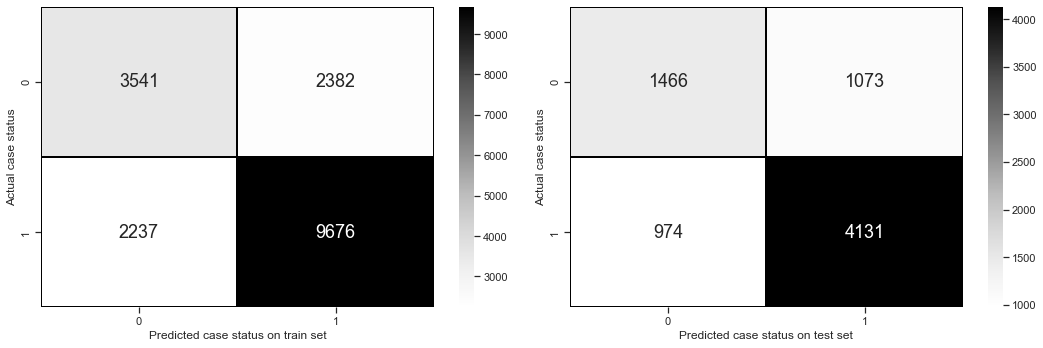

In [153]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_DTree_tuned = DTree_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_DTree_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="", cmap='Greys',linewidths=2, linecolor='black',annot_kws={"size": 18} )#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test__DTree_tuned = DTree_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test__DTree_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",cmap='Greys',linewidths=2, linecolor='black',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [154]:
error_train_matrix_perc = (2237+ 2382) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(error_train_matrix_perc,2)}%")

 The total error for train data is 25.9%


In [155]:

error_test_matrix_perc = (974 + 1073) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(error_test_matrix_perc,2)}%")

 The total error for test data is 26.78%


DTree_tuned is giving good results in both data set and train set. f1_score is very similar for both sets, around 0.8 what is a decent result. Accuracy could be better but overall, the performance is decent, and the model is not overfitted. Still the total error for test set is 26% that is much better than the initial tree with 36% error.

**Model comparison before and after tuning**

In [156]:

print('Model DTree before tuning')
print(perf_Dtree_train)
print(perf_Dtree_test)
print('--------')
print('Model DTree_tuned after tuning')
print(perf_Dtree_tuned_train)
print(perf_Dtree_tuned_test)


Model DTree before tuning
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.653715  0.749265    0.73671  0.742935
--------
Model DTree_tuned after tuning
   Accuracy    Recall  Precision        F1
0  0.741029  0.812222   0.802455  0.807309
   Accuracy    Recall  Precision        F1
0  0.732208  0.809207   0.793812  0.801436


We can clearly see an improvement with the parameter tuning, the tuned model is not overfitting.

#### 7.2 Bagging- Bagg_tuned model

In [157]:
# classifier with class_weight to balance the target data
Bagg_tuned=Bagg=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67 ,1:0.33},random_state=1),random_state=1)
parameters={'max_samples': [0.6,0.8,1], 
              'max_features': [0.7,0.9,1],
              'n_estimators' : [10,30,50],
             }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(Bagg_tuned ,parameters, scoring=scorer)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

Bagg_tuned= grid_obj.best_estimator_#find the best model of all 
Bagg_tuned.fit(x_train, y_train)#train x_train and y_train

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.6, n_estimators=50,
                  random_state=1)

The model chosen parameters are maximum features or columns 0.9, maximum samples to draw for x to train data is 0.6(60%) and 50 trees.

**Performance and Confusion matrix**

In [158]:
#Checking performance of the Bagg_tuned model on train set

perf_Bagg_tuned_train=model_performance_classification_sklearn(Bagg_tuned, x_train, y_train)
perf_Bagg_tuned_train

,Accuracy,Recall,Precision,F1
0,0.980377,0.997398,0.973855,0.985486


In [159]:
#Checking performance of the Bagg_tuned model on test set

perf_Bagg_tuned_test=model_performance_classification_sklearn(Bagg_tuned, x_test, y_test)
perf_Bagg_tuned_test

,Accuracy,Recall,Precision,F1
0,0.726321,0.86621,0.75836,0.808705


<function matplotlib.pyplot.show(close=None, block=None)>

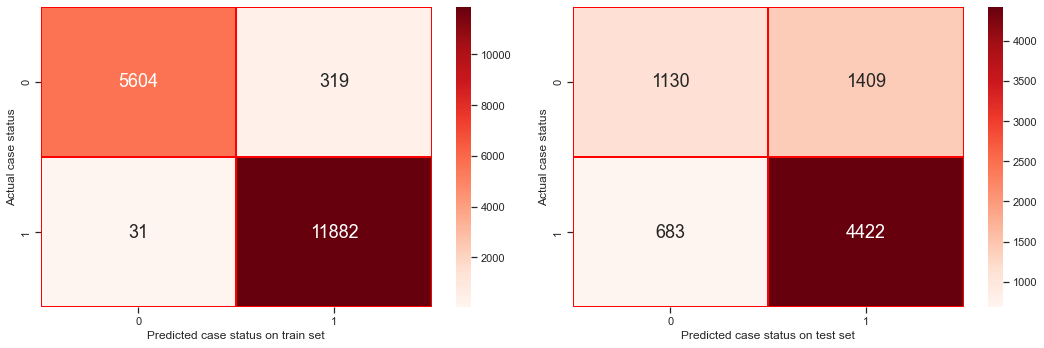

In [160]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Bagg_tuned = Bagg_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Bagg_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Bagg_tuned = Bagg_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Bagg_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [161]:
Bagg_tuned_error_train_matrix_perc = (31+319) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(Bagg_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 1.96%


In [162]:
Bagg_tuned_error_test_matrix_perc = (683+1409) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(Bagg_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 27.37%


This model is overfitting and the hyperparameters improved slightly the performance but still there is a huge gap between train and test sets.
The overall error shown on test set is 27% vs 30% on the previous model, so it is a little improvement.
When checking the performance metrics, on the train set the results are close to 1 and for the test set the results are of most of the metrics are around 0.8, what it a clear sign of overfitting.


**Comparing model before and after tuning**

In [163]:
print('Model Bagg before tuning')
print(perf_Bagg_train)
print(perf_Bagg_test)
print('--------')
print('Model Bagg_tuned after tuning')
print(perf_Bagg_tuned_train)
print(perf_Bagg_tuned_test)


Model Bagg before tuning
   Accuracy    Recall  Precision        F1
0  0.985479  0.987241   0.990984  0.989109
   Accuracy    Recall  Precision        F1
0  0.695709  0.778844   0.768606  0.773691
--------
Model Bagg_tuned after tuning
   Accuracy    Recall  Precision        F1
0  0.980377  0.997398   0.973855  0.985486
   Accuracy   Recall  Precision        F1
0  0.726321  0.86621    0.75836  0.808705


For the test data set the performance results have improved slightly, but still this is not a good model before of after tuning.

#### 7.3 Random Forest - RF_tuned model

In [164]:
# classifier with class_weight to balance the target data
RF_tuned=RandomForestClassifier(criterion='gini', class_weight={0:0.67 ,1:0.33}, random_state=1)
parameters={        
        "n_estimators": [10,30,50],
        "max_features": [0.5,0.7,0.9],
        "max_samples": [0.6,0.9,None],
        'max_depth':[2,6]
             }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(RF_tuned ,parameters, scoring=scorer,n_jobs=1)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

RF_tuned= grid_obj.best_estimator_#find the best model of all 
RF_tuned.fit(x_train, y_train)#train x_train and y_train

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=6,
                       max_features=0.5, n_estimators=50, random_state=1)

The best model for the given parameters is maximum depth of the trees 6 levels, maximum of columns to use from data 60% and 50 decision tree models.

**Performance and confusion matrix**

In [165]:
#Checking performance of the RF_tuned  model on train set

perf_RF_tuned_train=model_performance_classification_sklearn(RF_tuned, x_train, y_train)
perf_RF_tuned_train

,Accuracy,Recall,Precision,F1
0,0.725499,0.750273,0.823096,0.784999


In [166]:
#Checking performance of the RF_tuned tree model on test set

perf_RF_tuned_test=model_performance_classification_sklearn(RF_tuned, x_test, y_test)
perf_RF_tuned_test

,Accuracy,Recall,Precision,F1
0,0.718995,0.748286,0.815716,0.780548


<function matplotlib.pyplot.show(close=None, block=None)>

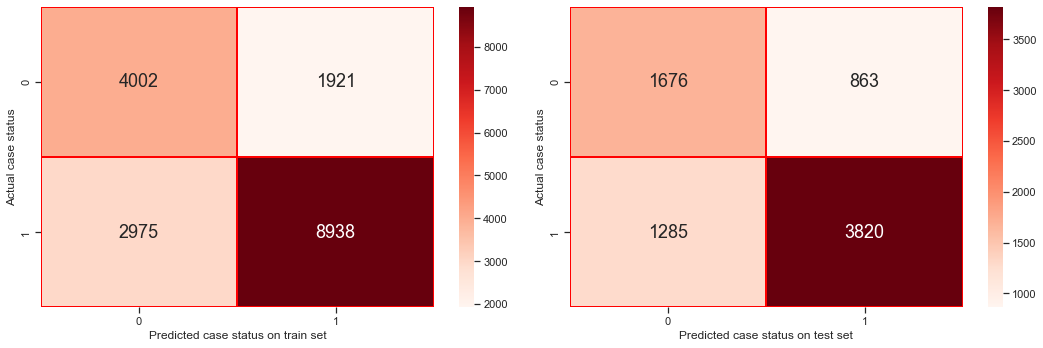

In [167]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_RF_tuned = RF_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_RF_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_RF_tuned = RF_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_RF_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='red',cmap='Reds',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [168]:
RF_tuned_error_train_matrix_perc = (2975+1921) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(RF_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 27.45%


In [169]:
RF_tuned_error_test_matrix_perc = (1285+863) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(RF_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 28.1%


After checking the model’s performance and the confusion matrices, we can conclude this models has a decent performance, train and validation sets are both very close. The f1_score that is our main metrics, it is in both set 0.78 what is not great but acceptable. The overall error is 28% for the test data and 26% for the train data.

**Model comparison before and after tuning**

In [170]:
print('Model RF before tuning')
print(perf_RF_train)
print(perf_RF_test)
print('--------')
print('Model RF_tuned after tuning')
print(perf_RF_tuned_train)
print(perf_RF_tuned_test)

Model RF before tuning
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.723182  0.842703   0.766162  0.802612
--------
Model RF_tuned after tuning
   Accuracy    Recall  Precision        F1
0  0.725499  0.750273   0.823096  0.784999
   Accuracy    Recall  Precision        F1
0  0.718995  0.748286   0.815716  0.780548


The tuned models is a much better one: precision  score is giving a good result  for the test set and the RF_tuned has better prediction power than RF.

#### 7.4 Adaboosting - Ada_tuned model

In [171]:
# classifier with class_weight to balance the target data
Ada_tuned=AdaBoostClassifier(DecisionTreeClassifier(max_depth=6 ,random_state=1),random_state=1)
parameters={        
       "n_estimators": [10,50,60],
       "learning_rate":[0.1,0.2]
             }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(Ada_tuned ,parameters, scoring=scorer)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

Ada_tuned= grid_obj.best_estimator_#find the best model of all 
Ada_tuned.fit(x_train, y_train)#train x_train and y_train

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

For the hyperparameters we provided to the classifier, the best model has a learning rate of 0.2 and 10 decision trees.

**Performance and confusion matrix**

In [172]:
#Checking performance of the Ada_tuned model on train set

perf_Ada_tuned_train=model_performance_classification_sklearn(Ada_tuned, x_train, y_train)

perf_Ada_tuned_train

,Accuracy,Recall,Precision,F1
0,0.768334,0.90481,0.782391,0.839159


In [173]:
#Checking performance of the Ada_tuned model on test set

perf_Ada_tuned_test=model_performance_classification_sklearn(Ada_tuned, x_test, y_test)
perf_Ada_tuned_test

,Accuracy,Recall,Precision,F1
0,0.737964,0.883448,0.762082,0.818289


<function matplotlib.pyplot.show(close=None, block=None)>

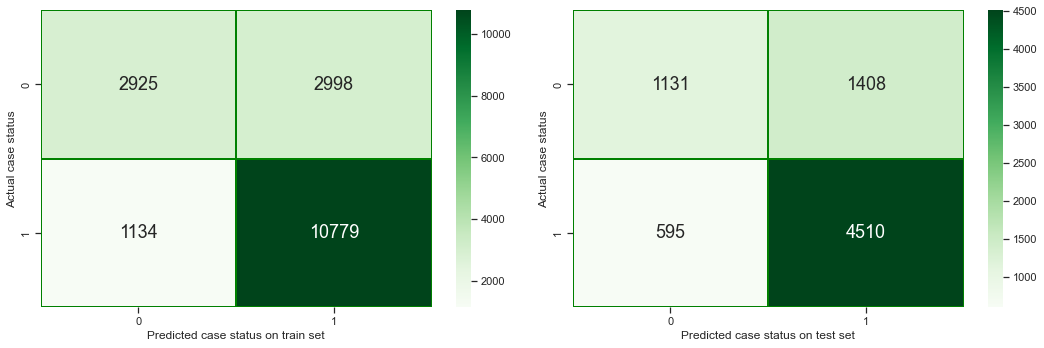

In [175]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Ada_tuned = Ada_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Ada_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Ada_tuned = Ada_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Ada_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [176]:
Ada_tuned_error_train_matrix_perc = (1134+2998) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(Ada_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 23.17%


In [177]:
Ada_tuned_error_test_matrix_perc = (595+1408) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(Ada_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 26.2%


The tuned model performs slightly better on train set and the percentage of misclassifications seems to be a bit lower too, 23% vs 26% on test set.
F1_score for the test set is 0.81 and for train 0.83 what is fine. Accuracy is not great around 0.73 and 0.75 for validation and train set. On the other hand, recall is the metrics with better performance.


**Model comparison before and after tuning**

In [178]:
print('Model Ada before tuning')
print(perf_Ada_train)
print(perf_Ada_test)
print('--------')
print('Model Ada_tuned after tuning')
print(perf_Ada_tuned_train)
print(perf_Ada_tuned_test)

Model Ada before tuning
   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481
--------
Model Ada_tuned after tuning
   Accuracy   Recall  Precision        F1
0  0.768334  0.90481   0.782391  0.839159
   Accuracy    Recall  Precision        F1
0  0.737964  0.883448   0.762082  0.818289


If we compare both model before and after tuning, the accuracy improved slightly after tuning and also f1_score but mostly on data set. There is almost not change for this model after tuning.Both models are moderately good for prediction.

#### 7.5 Gradient Boosting - GB_tuned model

In [179]:
# classifier with class_weight to balance the target data
GB_tuned= GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
parameters={        
      
    "n_estimators": [20,50,80],
    "max_depth":[3,6],
    "max_features":[0.7,0.9,1]
 }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(GB_tuned ,parameters, scoring=scorer)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

GB_tuned= grid_obj.best_estimator_#find the best model of all 
GB_tuned.fit(x_train, y_train)#train x_train and y_train

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=50, random_state=1)


The tuned model best estimator uses the 70% of the features of the x_train data and the maximum of trees is 50.Also we can notice that we have uset the Adabooster classifier as iniciator since it gave us good results initially.

**Model performance and confusion matrix**

In [180]:
#Checking performance of the GB_tuned model on train set

perf_GB_tuned_train= model_performance_classification_sklearn(GB_tuned, x_train, y_train)
perf_GB_tuned_train

,Accuracy,Recall,Precision,F1
0,0.753813,0.885503,0.777033,0.82773


In [181]:
#Checking performance of the GB_tuned model on test set

perf_GB_tuned_test=model_performance_classification_sklearn(GB_tuned, x_test, y_test)
perf_GB_tuned_test

,Accuracy,Recall,Precision,F1
0,0.742282,0.878942,0.768454,0.819993


<function matplotlib.pyplot.show(close=None, block=None)>

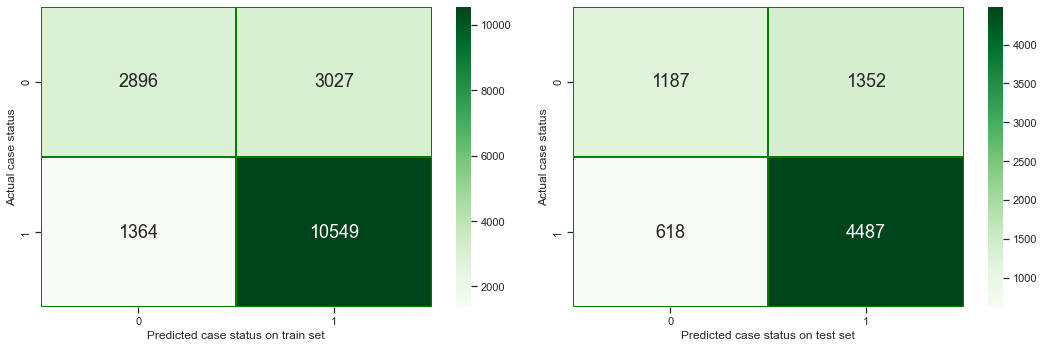

In [182]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_GB_tuned = GB_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_GB_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_GB_tuned = GB_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_GB_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [183]:
GB_tuned_error_train_matrix_perc = (1364+3027) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(GB_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 24.62%


In [184]:
GB_tuned_error_test_matrix_perc = (618+1352) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(GB_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 25.77%


This model’s performance is showing f1_score results for test 0.81 and for the train set 0.82. The accuracy is 0.74 for the test set and 0.75 for the train set so it is not different from the previous toned models. The confusion matrix shows a percentage of error in train and test set very close (24 and 25 per cent respectively).

**Model comparison before and after tuning**

In [185]:
print('Model GB before tuning')
print(perf_GB_train)
print(perf_GB_test)
print('--------')
print('Model GB_tuned after tuning')
print(perf_GB_tuned_train)
print(perf_GB_tuned_test)

Model GB before tuning
   Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
   Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927
--------
Model GB_tuned after tuning
   Accuracy    Recall  Precision       F1
0  0.753813  0.885503   0.777033  0.82773
   Accuracy    Recall  Precision        F1
0  0.742282  0.878942   0.768454  0.819993


GB and GB_tuned are showing same performance. Tuning indeed did not improve the model, f1_score was a bit better on the model before tuning.

#### 7.6 XG boosting - XGB_tuned model

In [186]:
# classifier with class_weight to balance the target data
XGB_tuned=XGBClassifier(random_state=1,eval_metric='logloss')
parameters={        
   "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "learning_rate":[0.05, 0.1,0.2],
    'max_depth':[3,6,8]
 }#parameters to choose
scorer=metrics.make_scorer(metrics.f1_score)# create metric to compare different trees
grid_obj=GridSearchCV(XGB_tuned ,parameters, scoring=scorer)# to perform a Gridsearch with cross validation
grid_obj=grid_obj.fit(x_train,y_train)#train data in the different models of the grid search

XGB_tuned= grid_obj.best_estimator_#find the best model of all 
XGB_tuned.fit(x_train, y_train)#train x_train and y_train

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The best model found by the XGboosting technique is assigning a learning rate of 0.2 to the model, maximum of trees is 10, both classes are assigned same weight, and the maximum depth per tree is 6 levels.

**Model performance and confusion matrix**

In [187]:
#Checking performance of the XGB_tuned model on train set

perf_XGB_tuned_train= model_performance_classification_sklearn(XGB_tuned, x_train, y_train)
perf_XGB_tuned_train

,Accuracy,Recall,Precision,F1
0,0.762671,0.885755,0.786055,0.832932


In [188]:
#Checking performance of the XGB_tuned model on test set

perf_XGB_tuned_test=model_performance_classification_sklearn(XGB_tuned, x_test, y_test)
perf_XGB_tuned_test

,Accuracy,Recall,Precision,F1
0,0.745029,0.873457,0.773863,0.82065


<function matplotlib.pyplot.show(close=None, block=None)>

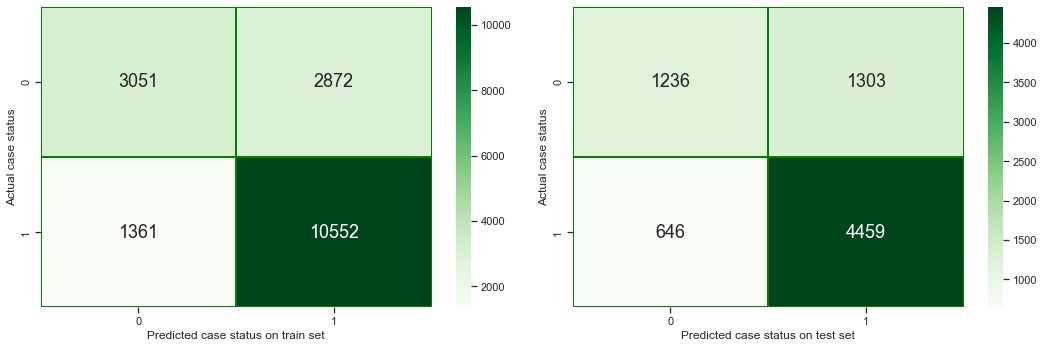

In [189]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_XGB_tuned = XGB_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_XGB_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_XGB_tuned = XGB_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_XGB_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='green',cmap='Greens',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separation among plots
plt.show

In [190]:
XGB_tuned_error_train_matrix_perc = (1361+2872) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(XGB_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 23.73%


In [191]:
XGB_tuned_error_test_matrix_perc = (646+1303) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(XGB_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 25.5%


The model XGB_tuned is not significantly better than GB. F1_score is 0.83 for the training set and 0.82 for the test set. Recall score is higher for both sets near 0.88 for the train set and 0.87 for Test set. Accuracy is decent (0.74 and 0.76 for test and training set respectively). The overall errors has been reduced for the test set as we can see in the confusion matrix, with 25% error for XGB_tuned.

**Model comparison before and after tuning**

In [192]:
print('Model XGB before tuning')
print(perf_XGB_train)
print(perf_XGB_test)
print('--------')
print('Model XGB_tuned after tuning')
print(perf_XGB_tuned_train)
print(perf_XGB_tuned_test)

Model XGB before tuning
   Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
   Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675
--------
Model XGB_tuned after tuning
   Accuracy    Recall  Precision        F1
0  0.762671  0.885755   0.786055  0.832932
   Accuracy    Recall  Precision       F1
0  0.745029  0.873457   0.773863  0.82065


The XGB_tuned performance for train set is not as good as XGB because the initial XGB model seems to be overfitted. In the tuned model the f1_score improved a bit along with accuracy when compared to the initial model. XGB_tuned in more robust because there no such a gap between both data set performance results.

#### 7.7 Stacking - Stack_tuned model

Since we cannot directly use hyperparameters on this model, we are going to use some of the tuned models as estimators to fit the meta model.

In [193]:
estimator = [('Adaboost_tuned',Ada_tuned), ('Gradient Boosting Tuned',GB_tuned), ('Decision Tree Tuned',DTree_tuned)]# initial learners
Final_estimator=XGB_tuned #meta model to combine the initial learners
#creating stacking classifier
Stack_tuned=StackingClassifier(estimators=estimator, final_estimator=Final_estimator)
#fitting the model
Stack_tuned.fit(x_train,y_train)

StackingClassifier(estimators=[('Adaboost_tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                         random_state=1),
                                                   learning_rate=0.2,
                                                   n_estimators=10,
                                                   random_state=1)),
                               ('Gradient Boosting Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=50,
                                                           random_state=1)),
                               ('Decision Tree Tuned',
                                De...
                                                 gpu_

We can see above the hyperparameters used for each of the model that we commented on previous sections.

**Model performance and confusion matrix**

In [194]:
#Checking performance of the Stack_tuned model on train set

perf_Stack_tuned_train= model_performance_classification_sklearn(Stack_tuned, x_train, y_train)
perf_Stack_tuned_train

,Accuracy,Recall,Precision,F1
0,0.75342,0.875262,0.781693,0.825836


In [195]:
#Checking performance of the Stack_tuned model on test set

perf_Stack_tuned_test= model_performance_classification_sklearn(Stack_tuned, x_test, y_test)
perf_Stack_tuned_test

,Accuracy,Recall,Precision,F1
0,0.740319,0.869931,0.770739,0.817337


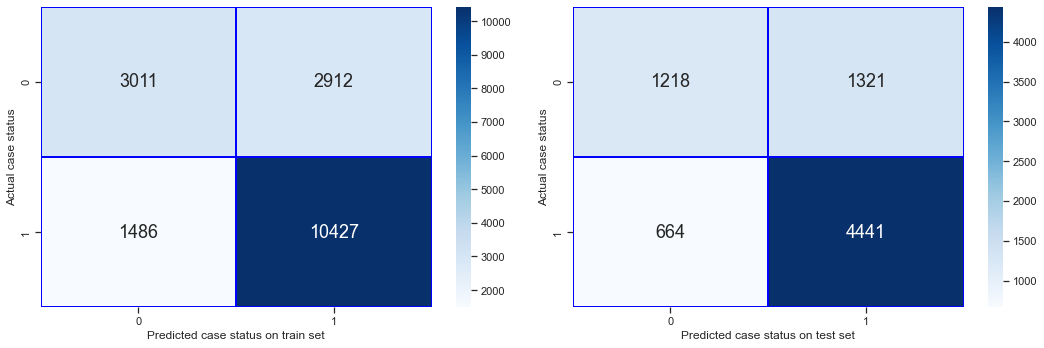

In [196]:
# let's check the confusion matrix
plt.figure(figsize=(15, 5))#set size
plt.subplot(1, 2, 1)#create subplot
pred_train_Stack_tuned = Stack_tuned.predict(x_train)#predict values on train set
cm = confusion_matrix(y_train, pred_train_Stack_tuned)# create confusion matrix on train set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='blue',cmap='Blues',annot_kws={"size": 18})#plot matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on train set")#label axis x
plt.subplot(1, 2, 2)#second subplot
pred_test_Stack_tuned = Stack_tuned.predict(x_test)#predict on test set
cm = confusion_matrix(y_test, pred_test_Stack_tuned)# create confusion matrix on test set
sns.heatmap(cm, annot=True, fmt="",linewidths=2, linecolor='blue',cmap='Blues',annot_kws={"size": 18})#plot confusion matrix
plt.ylabel("Actual case status")#label axis y
plt.xlabel("Predicted case status on test set")#label axis x
plt.tight_layout()#create separat

In [197]:
Stack_tuned_error_train_matrix_perc = (1486+2912) / x_train.shape[0] * 100
print(f" The total error for train data is {np.round(Stack_tuned_error_train_matrix_perc,2)}%")

 The total error for train data is 24.66%


In [198]:
Stack_tuned_error_test_matrix_perc = (664+1321) / x_test.shape[0] * 100
print(f" The total error for test data is {np.round(Stack_tuned_error_test_matrix_perc,2)}%")

 The total error for test data is 25.97%


Stack_tuned shows performance very similar to the previous tuned models. The f1_score is 0.81 and 0.82 for the train and test set.
Accuracy is 0.74 and 0.75 for the test and train set. Recall is the metric with higher performance for both sets (0.86 and 0.87 for the validation and train set respectively). Both sets metrics results are very close, so this is an indicator of a robust model. Also, the error for test and train is very similar 24 and 25 per cent respectively.
 

**Model comparison before and after tuning**

In [199]:
print('Model Stack before tuning')
print(perf_Stack_train)
print(perf_Stack_test)
print('--------')
print('Model Stack_tuned after tuning')
print(perf_Stack_tuned_train)
print(perf_Stack_tuned_test)

Model Stack before tuning
   Accuracy    Recall  Precision        F1
0  0.763512  0.886091   0.786763  0.833478
   Accuracy    Recall  Precision        F1
0  0.736787  0.866014   0.769003  0.814631
--------
Model Stack_tuned after tuning
   Accuracy    Recall  Precision        F1
0   0.75342  0.875262   0.781693  0.825836
   Accuracy    Recall  Precision        F1
0  0.740319  0.869931   0.770739  0.817337


After tuning, the stack model seems to perform slightly better on the test set, but the train set has a tiny decrease on the metric results. In general, there is almost no difference between the model before and after tuning.

## 8. Model Performance Comparison and Conclusions

Let's compare all models in order to decide which of them would be the best model to classify the case_status of a visa applicant.

In [200]:
# training performance comparison

models_train_comp_df = pd.concat(
    [perf_Dtree_train.T, perf_Dtree_tuned_train.T, perf_Bagg_train.T,perf_Bagg_tuned_train.T,perf_RF_train.T,perf_RF_tuned_train.T,perf_Ada_train.T,perf_Ada_tuned_train.T, perf_GB_train.T,perf_GB_tuned_train.T,perf_XGB_train.T,perf_XGB_tuned_train.T,perf_Stack_train.T,perf_Stack_tuned_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    'Model DTree before tuning',
    'Model DTree_tuned after tuning',
    'Model Bagg before tuning',
    'Model Bagg_tuned after tuning',
    'Model RF before tuning',
    'Model RF_tuned after tuning',
    'Model Ada before tuning',
    'Model Ada_tuned after tuning',
    'Model GB before tuning',
    'Model GB_tuned after tuning',
    'Model XGB before tuning',
    'Model XGB_tuned after tuning',
    'Model Stack before tuning',
    'Model Stack_tuned after tuning'
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Model DTree before tuning,1.000000,1.000000,1.000000,1.000000
Model DTree_tuned after tuning,0.741029,0.812222,0.802455,0.807309
Model Bagg before tuning,0.985479,0.987241,0.990984,0.989109
Model Bagg_tuned after tuning,0.980377,0.997398,0.973855,0.985486
Model RF before tuning,1.000000,1.000000,1.000000,1.000000
Model RF_tuned after tuning,0.725499,0.750273,0.823096,0.784999
Model Ada before tuning,0.738226,0.887182,0.760688,0.819080
Model Ada_tuned after tuning,0.768334,0.904810,0.782391,0.839159
Model GB before tuning,0.758802,0.883740,0.783042,0.830349
Model GB_tuned after tuning,0.753813,0.885503,0.777033,0.827730


In [201]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [perf_Dtree_test.T, perf_Dtree_tuned_test.T, perf_Bagg_test.T, perf_Bagg_tuned_test.T, perf_RF_test.T, perf_RF_tuned_test.T, perf_Ada_test.T, perf_Ada_tuned_test.T, perf_GB_test.T, perf_GB_tuned_test.T, perf_XGB_test.T, perf_XGB_tuned_test.T, perf_Stack_test.T, perf_Stack_tuned_test.T], axis=1)


models_test_comp_df.columns = [
    'Model DTree before tuning',
    'Model DTree_tuned after tuning',
    'Model Bagg before tuning',
    'Model Bagg_tuned after tuning',
    'Model RF before tuning',
    'Model RF_tuned after tuning',
    'Model Ada before tuning',
    'Model Ada_tuned after tuning',
    'Model GB before tuning',
    'Model GB_tuned after tuning',
    'Model XGB before tuning',
    'Model XGB_tuned after tuning',
    'Model Stack before tuning',
    'Model Stack_tuned after tuning'
]
    
print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,Accuracy,Recall,Precision,F1
Model DTree before tuning,0.653715,0.749265,0.736710,0.742935
Model DTree_tuned after tuning,0.732208,0.809207,0.793812,0.801436
Model Bagg before tuning,0.695709,0.778844,0.768606,0.773691
Model Bagg_tuned after tuning,0.726321,0.866210,0.758360,0.808705
Model RF before tuning,0.723182,0.842703,0.766162,0.802612
Model RF_tuned after tuning,0.718995,0.748286,0.815716,0.780548
Model Ada before tuning,0.734301,0.885015,0.757799,0.816481
Model Ada_tuned after tuning,0.737964,0.883448,0.762082,0.818289
Model GB before tuning,0.744767,0.876004,0.772366,0.820927
Model GB_tuned after tuning,0.742282,0.878942,0.768454,0.819993


After comparing all models, we can conclude that model XGB_tuned and GB show similar performance. Both model’s metrics are very close. XGB_tuned seems to do a bit better in train set, especially noticeable for some metrics such as accuracy. Since our main goal is maximize  f1_score, we can see slightly better results on GB model, so this would be our best classification model for visa case status, and easier to implement that any tuned model.

## 9.Final model: **GB model features**

In [202]:
# importance of features of GB model

print(
    pd.DataFrame(
      GB.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)#create data frame to show the importance of each feature of the modelin descending order

                                        Imp
education_of_employee_High School  0.285978
has_job_experience_Y               0.155462
prevailing_wage                    0.136663
education_of_employee_Master's     0.087565
education_of_employee_Doctorate    0.083538
continent_Europe                   0.063035
unit_of_wage_Year                  0.036526
region_of_employment_Midwest       0.034432
region_of_employment_South         0.019024
no_of_employees                    0.014866
continent_North America            0.014537
yr_of_estab                        0.014220
region_of_employment_West          0.013583
continent_Asia                     0.011354
full_time_position_Y               0.009000
region_of_employment_Northeast     0.008039
continent_South America            0.007043
requires_job_training_Y            0.004692
continent_Oceania                  0.000311
unit_of_wage_Month                 0.000133
unit_of_wage_Week                  0.000000


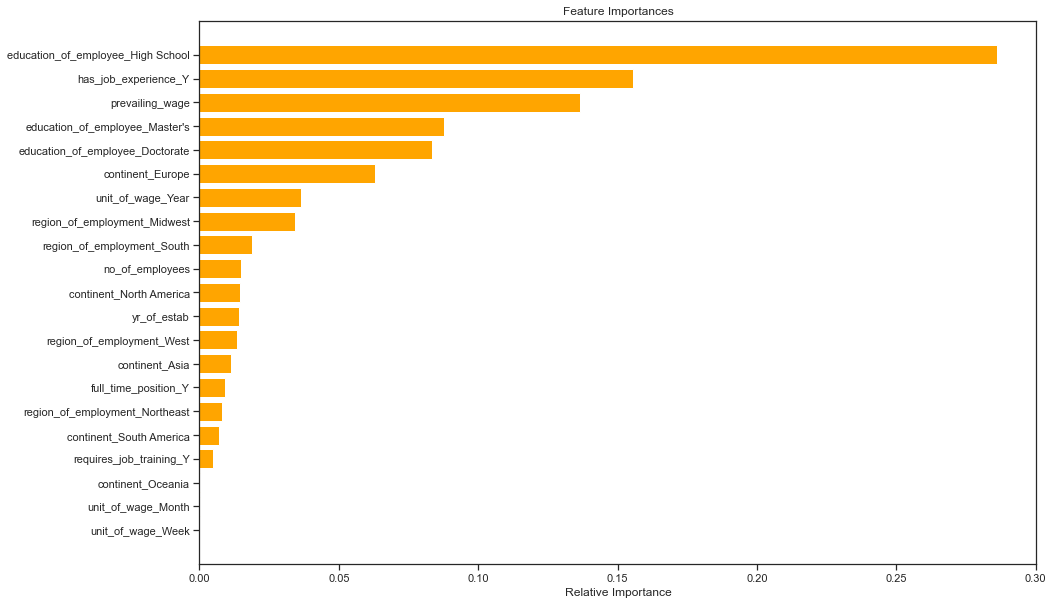

In [203]:
#plotting models importance features in descending order
feature_names = x_train.columns
importances = GB.feature_importances_#create importances of the model
indices = np.argsort(importances)#set descending order

plt.figure(figsize=(15,10))
plt.title('Feature Importances')#features relevant on GB model
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')#create horizontal bars and assign length to each of the bars
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])#assign names for the features on y axis
plt.xlabel('Relative Importance')#title
plt.show()

Model GB shows only 18 features relevant for the case_status prediction. Each of them is assigned different weight. In first place, the most relevant feature is education_of_employee_High School with almost 29% of the weight. As we previously saw, high school graduate applications would be more likely to be denied.

Previous work experience and prevailed wage are both positively related to certified cases with 15 percent and 14 percent of the model's prediction weight.

Education_masters or Education_doctorate are also relevant features for GB model with 9% and 8% percent of the weight. They are both associated to more likelihood of case_status certified, what would mean visa approval.

Europe is the sixth feature in term of relevance for this model. We could see throughout the EDA that the continent with higher rate of acceptance was Europe (6 per cent of the model's weight).

In seventh and eight position we can find unit_of_wage_year and Region_of_emplyment_Midwest with around 3.5 per cent each. Yearly rate had higher number of certified cases. Midwest region was also most prone to have higher prevailed wages that seems to be a positive factor for the program approval.

The weight of the rest of the features is around 1 or 2 per cent, so these variables are not so relevant for the model as the previous ones.

Continent_Oceania, Unit_wage_month and unit_wage_week are not assigned any relevant weight so the GB model disregard the mentioned features, especially unit_wage_week.
 


## 10. Actionable Insights and Recommendations

In recent years the number of companies that demand foreign talent in United Stated has raised and even though it can be seen as a threat to the American workforce, international workers contribute to enrich the productivity and enhance production processes. The mentioned professionals bring new knowledge and different approaches.

Since the number of visa approvals is limited to protect the employment among the country population, and with the need of automatize the high volume of applications classifications, we need to focus on minimize the number of errors.

If the process continually misclassifies the applicants, then we could risk granting the program to people that should not qualify, either because there not enough vacancies in a certain industry field or because the salary or condition would damage the labor market. On the other hand, talented and specialized employees could have issues getting their employment visas approved. Certain professional profiles are scarce and not easily replaced in research, technology, science of clinical practice.

We have built GB model that provide some guidance towards the attributes that can help decide over the applications case status. The model is providing the information we need to classify the cases between denied and coalified. Below there is a summary of the main features of this model.

-	Educational background: high school graduate (28.6%)

-	Previous job experience (15.5%) 

-	Prevailing wage (13.67%)   

-	Educational background: Master's degree (8.8%) 

-	Educational background: Doctorate (8.4%)

-	Origin employee: Europe (6%)     

-	Remuneration/ salary in yearly units (3%)

-	Region of employment Midwest (3%)  

-	Region of employment South (1.9%) 

-	Company number of employees (1.5%) 

-	Origin employee: North America (1.5%)

-	Year the company was established (1.4%)  

-	Region of employment West (1.3%)

-	Origin employee: Asia (1.1%) 

-	Full time position contract (0.9%)

-	Region of employment Northeast (0.8%)

-	Origin employee: South America (0.7%) 

-	Job training needed (0.4%)

-	Origin employee: Oceania (0.03%) 

-	Remuneration/ salary in monthly units (0.01%)

Some of these variables help assigning denied status like ‘high school graduate’ and other assigning certified status as ‘doctorate education’.

As we see previously there is still an important chance of misclassification with this model. The model is robust but there is room for improvement since the accuracy score is around 0.75. The GB model focusses on improving f1_score what is 0.82 and 0.83 for testing and training set. The overall error percentage is still 25% for the test set, so for every 100 cases, 25 could be misclassified.

Certainly, this model could be improved using different hyperparameters on a more powerful machine. 

Along with the model classifier, the government could implement certain policies to decrease the cases of applicant with small chances of getting an employment visa and also, others to prevent the program denial for talented prospective employees.

**Reducing False positives**

It is easier to implement policies that decrease false negatives on a two steps process.

-	The applicants that meet certain requirements such as a minimum salary, and higher education or certain industry field, should have reconsider for the position on a reasonable time frame (for example 1 month).

-	Other policies that could help the process avoid misclassification would be giving certain employers such as Universities and Research centers autonomy to select the employees they consider to be best qualified for the position, as long a certain salary is agreed (higher than the US average for the same position) and it is reported to OFLC.


**Reducing False positives**

Other policies to prevent false positives, employees that are assigned a certified status, but they should be denied for different reasons such as low prevailed salaries, low wages per hour, not having higher educational background of previous experience.

-	Prospective employees without previous experience on the field, should pass an initial screening process, before applying for visa employment. During the screening process, applicants should submit proof of educational excellent performance (3.5 or above GPA).


-	Applicants without higher education background should be requested to pass a previous screening process to show proof of at least 5 years related experience and a certify copy of the employment agreement with the prospective employer that shows a remuneration of 1.5 the average year salary for the same type of positions in the region of employment.


